# Summarize recorded interactions

In [1]:
# Import some useful modules
import json
import sys
import networkx
import pandas
import numpy

import matplotlib.pyplot as plotter
from pathlib import Path
from IPython.display import display, HTML

Specify the RESULTS_DIR used for recording interactions

In [2]:
# USE ABSOLUTE PATHS HERE!!!
DATA_DIR = Path("/home/ashinde/PhD/CaffineBravery/results/results_realistic_control/")
DATA_FILES = list(DATA_DIR.iterdir())

for _file in DATA_FILES:
    print(f"Using {_file}")

Using /home/ashinde/PhD/CaffineBravery/results/results_realistic_control/1979274004_attl0_pol_graph.json
Using /home/ashinde/PhD/CaffineBravery/results/results_realistic_control/1544895390_attl0_pol_graph.json
Using /home/ashinde/PhD/CaffineBravery/results/results_realistic_control/833240229_defl1_active_pol_graph.json
Using /home/ashinde/PhD/CaffineBravery/results/results_realistic_control/1167088639_defl1_passive_pol_graph.json
Using /home/ashinde/PhD/CaffineBravery/results/results_realistic_control/464872674_attl2_pol_graph.json
Using /home/ashinde/PhD/CaffineBravery/results/results_realistic_control/trace.0.json
Using /home/ashinde/PhD/CaffineBravery/results/results_realistic_control/trace.1.json
Using /home/ashinde/PhD/CaffineBravery/results/results_realistic_control/trace.2.json
Using /home/ashinde/PhD/CaffineBravery/results/results_realistic_control/trace.3.json
Using /home/ashinde/PhD/CaffineBravery/results/results_realistic_control/trace.4.json
Using /home/ashinde/PhD/CaffineB

In [3]:
# Common utility function for reading JSON from a file
def load_json(fname):

    data = None

    with open(fname) as f:
        data = json.load(f)

    return data

---
Take a look at the policy graphs of the agents

In [4]:
# Draw policy graphs
import graphviz


def get_edge_map(edges):
    start = 0
    edge_map = {}
    multi_edge_map = {}
    
    for src, children in edges.items():
        for obs, child in children.items():
            
            # index this observation if not already done
            if obs not in edge_map.keys():
                edge_map[obs] = start
                start += 1
                
            # Add obs to (src, dst) key
            if (src, child) not in multi_edge_map.keys():
                multi_edge_map[(src, child)] = [edge_map[obs]]
            
            else:
                _l = multi_edge_map[(src, child)]
                _l.append(edge_map[obs])
                multi_edge_map[(src, child)] = _l
                
    return edge_map, multi_edge_map


def get_graphviz_graph(json_data):
    
    # initialize empty graph
    G = graphviz.Digraph()
    
    nodes = json_data["nodes"]
    edges = json_data["edges"]
    
    edge_map, multi_edge_map = get_edge_map(edges)
    print(f"Edge map is:")
    for e, i in edge_map.items():
        print(f"{i}:{e}")

    for k, v in nodes.items():
        l = v["act"] + "_start" if "start" in v.keys() else v["act"]
        G.node(k, label=l, fontsize="12")
        
    for s, t in multi_edge_map.keys():
        G.edge(s, t, label=str(multi_edge_map[(s, t)]))
        
    return G

---
## Plot policy graphs

Displaying /home/ashinde/PhD/CaffineBravery/results/results_realistic_control/1979274004_attl0_pol_graph.json
Edge map is:
0:[(ActionResult, success), (ConnObs, inactive), (DataTypeObs, fake), (AccTypeObs, legit)]
1:[(ActionResult, success), (ConnObs, inactive), (DataTypeObs, fake), (AccTypeObs, decoy)]
2:[(ActionResult, success), (ConnObs, inactive), (DataTypeObs, legit), (AccTypeObs, legit)]
3:[(ActionResult, success), (ConnObs, inactive), (DataTypeObs, legit), (AccTypeObs, decoy)]
4:[(ActionResult, failure), (ConnObs, inactive), (DataTypeObs, fake), (AccTypeObs, decoy)]
5:[(ActionResult, failure), (ConnObs, inactive), (DataTypeObs, fake), (AccTypeObs, legit)]
6:[(ActionResult, failure), (ConnObs, inactive), (DataTypeObs, legit), (AccTypeObs, legit)]
7:[(ActionResult, failure), (ConnObs, inactive), (DataTypeObs, legit), (AccTypeObs, decoy)]
8:[(ActionResult, failure), (ConnObs, active), (DataTypeObs, legit), (AccTypeObs, legit)]
9:[(ActionResult, failure), (ConnObs, active), (DataTyp

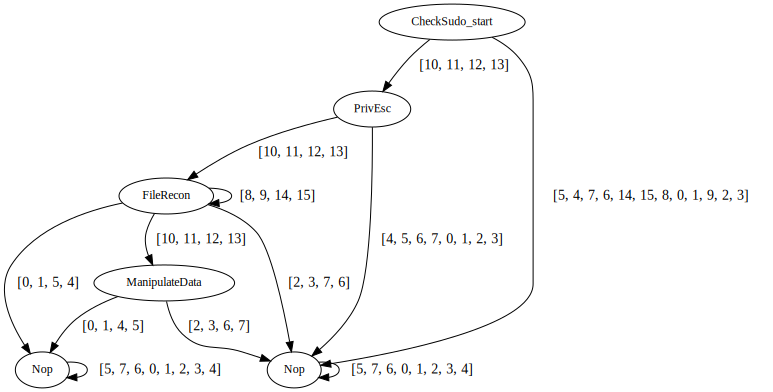

Displaying /home/ashinde/PhD/CaffineBravery/results/results_realistic_control/1544895390_attl0_pol_graph.json
Edge map is:
0:[(ActionResult, failure), (ConnObs, inactive), (DataTypeObs, fake), (AccTypeObs, legit)]
1:[(ActionResult, failure), (ConnObs, inactive), (DataTypeObs, legit), (AccTypeObs, decoy)]
2:[(ActionResult, failure), (ConnObs, inactive), (DataTypeObs, legit), (AccTypeObs, legit)]
3:[(ActionResult, success), (ConnObs, inactive), (DataTypeObs, fake), (AccTypeObs, legit)]
4:[(ActionResult, success), (ConnObs, inactive), (DataTypeObs, fake), (AccTypeObs, decoy)]
5:[(ActionResult, success), (ConnObs, inactive), (DataTypeObs, legit), (AccTypeObs, legit)]
6:[(ActionResult, success), (ConnObs, inactive), (DataTypeObs, legit), (AccTypeObs, decoy)]
7:[(ActionResult, failure), (ConnObs, inactive), (DataTypeObs, fake), (AccTypeObs, decoy)]
8:[(ActionResult, failure), (ConnObs, active), (DataTypeObs, legit), (AccTypeObs, legit)]
9:[(ActionResult, failure), (ConnObs, active), (DataTyp

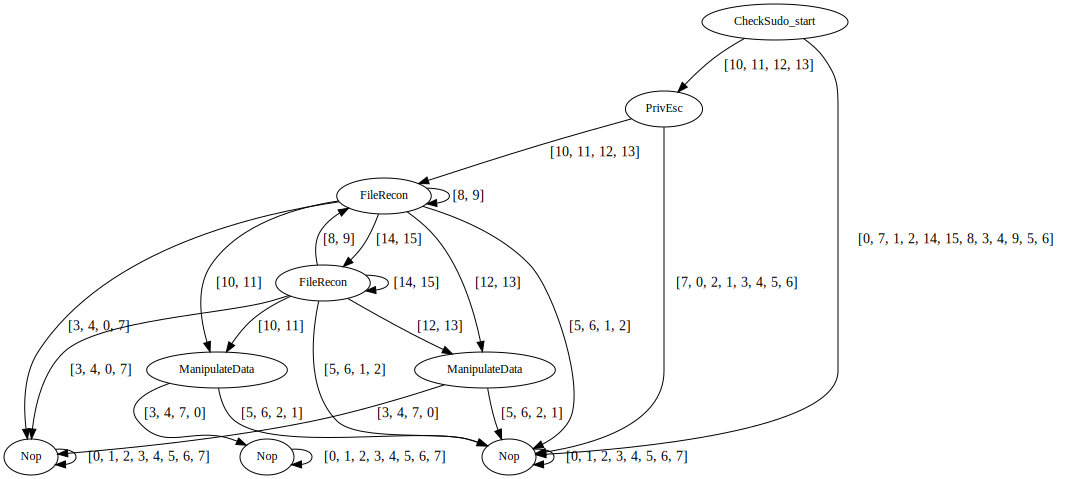

Displaying /home/ashinde/PhD/CaffineBravery/results/results_realistic_control/833240229_defl1_active_pol_graph.json
Edge map is:
0:[(EndPtAlerts, file_enum)]
1:[(EndPtAlerts, file_write)]
2:[(EndPtAlerts, none)]
3:[(EndPtAlerts, su_login)]


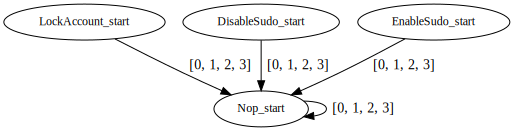

Displaying /home/ashinde/PhD/CaffineBravery/results/results_realistic_control/1167088639_defl1_passive_pol_graph.json
Edge map is:
0:[(EndPtAlerts, file_enum)]
1:[(EndPtAlerts, file_write)]
2:[(EndPtAlerts, none)]
3:[(EndPtAlerts, su_login)]


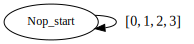

Displaying /home/ashinde/PhD/CaffineBravery/results/results_realistic_control/464872674_attl2_pol_graph.json
Edge map is:
0:[(ActionResult, failure), (ConnObs, active), (DataTypeObs, legit), (AccTypeObs, legit)]
1:[(ActionResult, failure), (ConnObs, active), (DataTypeObs, legit), (AccTypeObs, decoy)]
2:[(ActionResult, success), (ConnObs, active), (DataTypeObs, fake), (AccTypeObs, legit)]
3:[(ActionResult, success), (ConnObs, active), (DataTypeObs, fake), (AccTypeObs, decoy)]
4:[(ActionResult, success), (ConnObs, active), (DataTypeObs, legit), (AccTypeObs, legit)]
5:[(ActionResult, success), (ConnObs, active), (DataTypeObs, legit), (AccTypeObs, decoy)]
6:[(ActionResult, failure), (ConnObs, active), (DataTypeObs, fake), (AccTypeObs, decoy)]
7:[(ActionResult, failure), (ConnObs, active), (DataTypeObs, fake), (AccTypeObs, legit)]
8:[(ActionResult, failure), (ConnObs, inactive), (DataTypeObs, fake), (AccTypeObs, legit)]
9:[(ActionResult, failure), (ConnObs, inactive), (DataTypeObs, fake), (

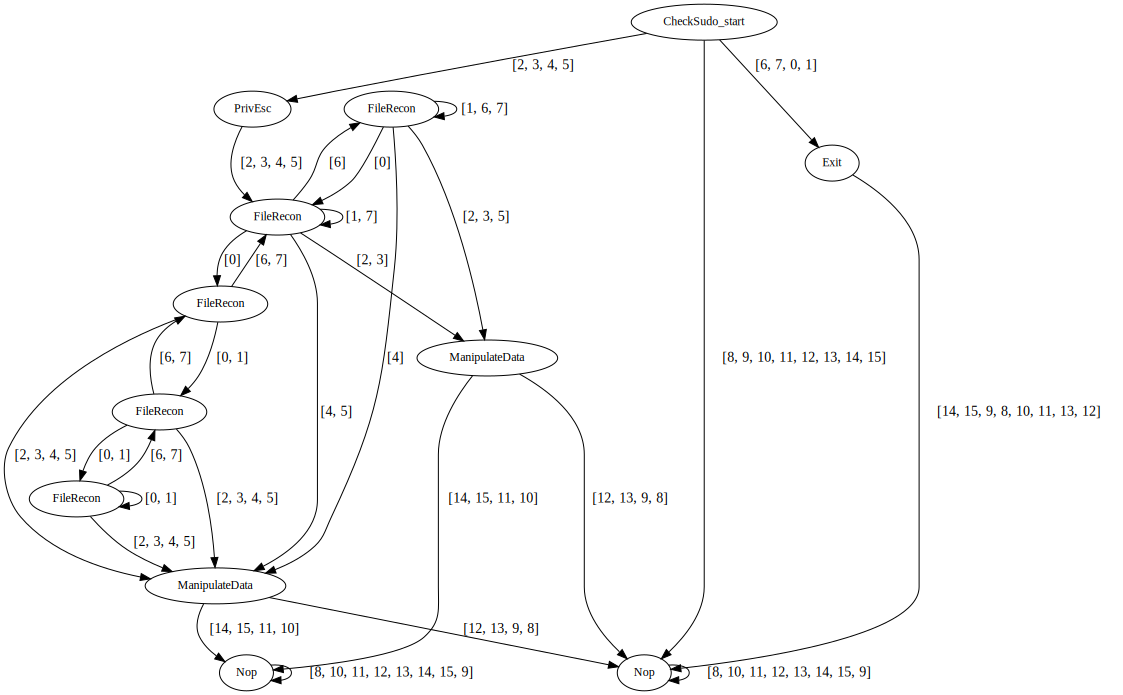

In [5]:
GRAPH_FILES = list(filter(lambda x: "pol_graph" in x.parts[-1], DATA_FILES))

for g in GRAPH_FILES:
    print(f"Displaying {g}")
    data = load_json(g)
    G = get_graphviz_graph(data)
    display(G)

---
Summarize the actual interactions

In [6]:
# Get the trace files
TRACE_FILES = list(filter(lambda x: "trace" in x.parts[-1], DATA_FILES))

for _file in TRACE_FILES:
    print(f"Using trace from {_file}")


Using trace from /home/ashinde/PhD/CaffineBravery/results/results_realistic_control/trace.0.json
Using trace from /home/ashinde/PhD/CaffineBravery/results/results_realistic_control/trace.1.json
Using trace from /home/ashinde/PhD/CaffineBravery/results/results_realistic_control/trace.2.json
Using trace from /home/ashinde/PhD/CaffineBravery/results/results_realistic_control/trace.3.json
Using trace from /home/ashinde/PhD/CaffineBravery/results/results_realistic_control/trace.4.json
Using trace from /home/ashinde/PhD/CaffineBravery/results/results_realistic_control/trace.5.json
Using trace from /home/ashinde/PhD/CaffineBravery/results/results_realistic_control/trace.6.json
Using trace from /home/ashinde/PhD/CaffineBravery/results/results_realistic_control/trace.7.json
Using trace from /home/ashinde/PhD/CaffineBravery/results/results_realistic_control/trace.8.json
Using trace from /home/ashinde/PhD/CaffineBravery/results/results_realistic_control/trace.9.json


+++++++++++++++++++ Begin Interaction +++++++++++++++++++


,agent_i.thetaj.DefFrame.active,agent_i.thetaj.DefFrame.passive,agent_i.observation.ActionResult',agent_i.observation.ConnObs',agent_i.observation.DataTypeObs',agent_i.observation.AccTypeObs'
0,0.500000,0.500000,success,active,legit,decoy
1,0.818182,0.181818,success,active,fake,decoy
2,0.818182,0.181818,success,active,fake,decoy
3,0.984802,0.015198,success,inactive,fake,legit
4,0.987723,0.012277,success,inactive,legit,legit
5,0.987723,0.012277,failure,inactive,fake,decoy
6,0.987723,0.012277,success,inactive,legit,legit
7,0.987723,0.012277,failure,inactive,legit,legit
8,0.987723,0.012277,success,inactive,fake,legit
9,0.987723,0.012277,success,inactive,fake,legit


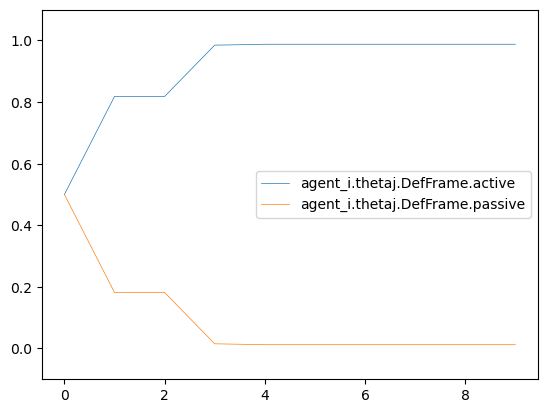

,agent_j.thetaj.AttackerFrame.att,agent_j.observation.EndPtAlerts'
0,1.0,none
1,1.0,su_login
2,1.0,file_enum
3,1.0,file_write
4,1.0,none
5,1.0,none
6,1.0,none
7,1.0,none
8,1.0,none
9,1.0,none


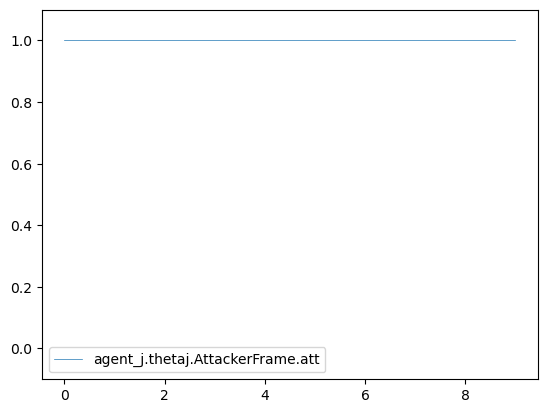

=============AttActive============


,state.AttActive.no,state.AttActive.yes,agent_i.action,agent_j.action
0,0.0,1.0,CheckSudo,EnableSudo
1,0.0,1.0,PrivEsc,Nop
2,0.0,1.0,FileRecon,Nop
3,0.0,1.0,ManipulateData,Nop
4,1.0,0.0,Nop,Nop
5,1.0,0.0,Nop,Nop
6,1.0,0.0,Nop,Nop
7,1.0,0.0,Nop,Nop
8,1.0,0.0,Nop,Nop
9,1.0,0.0,Nop,Nop


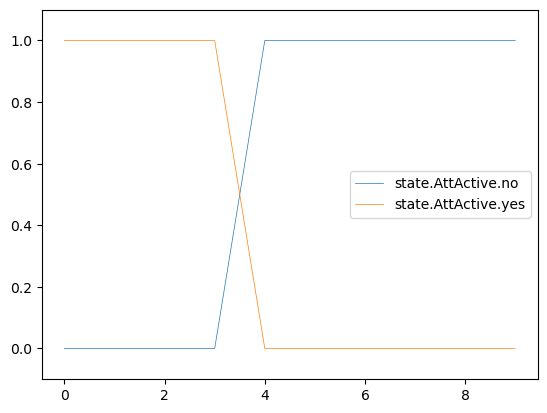

,agent_i.AttActive.no,agent_i.AttActive.yes,agent_i.action,agent_j.action,agent_i.observation.ActionResult',agent_i.observation.ConnObs',agent_i.observation.DataTypeObs',agent_i.observation.AccTypeObs'
0,0.0,1.0,CheckSudo,EnableSudo,success,active,legit,decoy
1,0.0,1.0,PrivEsc,Nop,success,active,fake,decoy
2,0.0,1.0,FileRecon,Nop,success,active,fake,decoy
3,0.0,1.0,ManipulateData,Nop,success,inactive,fake,legit
4,1.0,0.0,Nop,Nop,success,inactive,legit,legit
5,1.0,0.0,Nop,Nop,failure,inactive,fake,decoy
6,1.0,0.0,Nop,Nop,success,inactive,legit,legit
7,1.0,0.0,Nop,Nop,failure,inactive,legit,legit
8,1.0,0.0,Nop,Nop,success,inactive,fake,legit
9,1.0,0.0,Nop,Nop,success,inactive,fake,legit


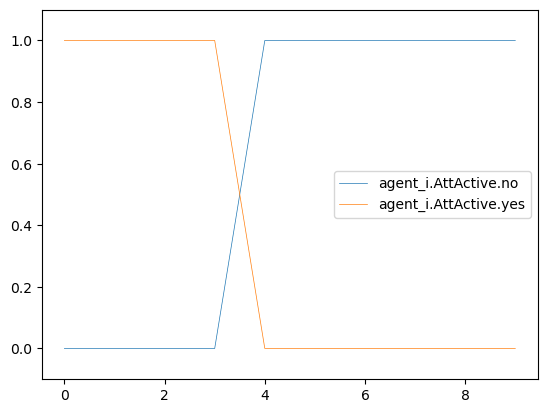

,agent_j.AttActive.no,agent_j.AttActive.yes,agent_j.action,agent_i.action,agent_j.observation.EndPtAlerts'
0,0.000000,1.000000e+00,EnableSudo,CheckSudo,none
1,0.000000,9.999999e-01,Nop,PrivEsc,su_login
2,0.000000,1.000000e+00,Nop,FileRecon,file_enum
3,0.000000,9.999999e-01,Nop,ManipulateData,file_write
4,0.979751,2.024922e-02,Nop,Nop,none
5,0.999744,2.559313e-04,Nop,Nop,none
6,0.999997,2.930344e-06,Nop,Nop,none
7,1.000000,3.232038e-08,Nop,Nop,none
8,1.000000,3.498224e-10,Nop,Nop,none
9,1.000000,3.748747e-12,Nop,Nop,none


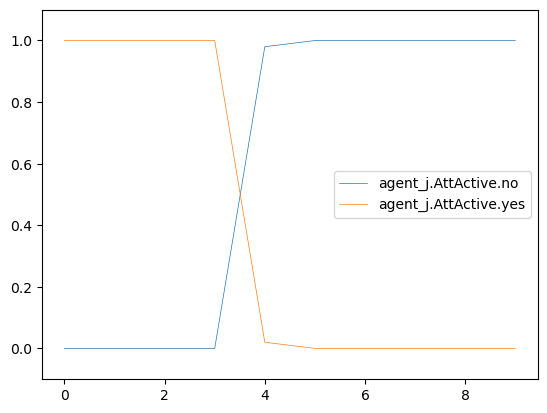

=============CompAccType============


,state.CompAccType.decoy,state.CompAccType.legit,state.CompAccType.u,agent_i.action,agent_j.action
0,1.0,0.0,0.0,CheckSudo,EnableSudo
1,1.0,0.0,0.0,PrivEsc,Nop
2,1.0,0.0,0.0,FileRecon,Nop
3,1.0,0.0,0.0,ManipulateData,Nop
4,1.0,0.0,0.0,Nop,Nop
5,1.0,0.0,0.0,Nop,Nop
6,1.0,0.0,0.0,Nop,Nop
7,1.0,0.0,0.0,Nop,Nop
8,1.0,0.0,0.0,Nop,Nop
9,1.0,0.0,0.0,Nop,Nop


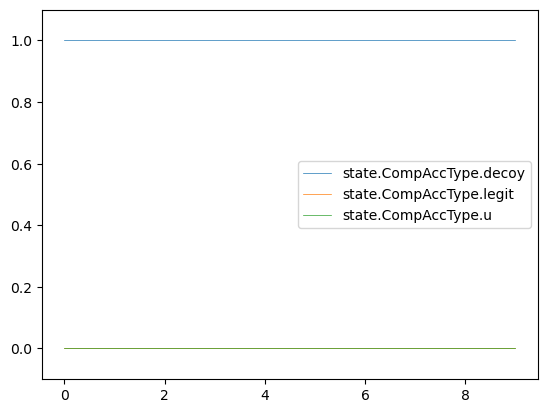

,agent_i.CompAccType.decoy,agent_i.CompAccType.legit,agent_i.CompAccType.u,agent_i.action,agent_j.action,agent_i.observation.ActionResult',agent_i.observation.ConnObs',agent_i.observation.DataTypeObs',agent_i.observation.AccTypeObs'
0,0.500000,0.500000,0.0,CheckSudo,EnableSudo,success,active,legit,decoy
1,0.818182,0.181818,0.0,PrivEsc,Nop,success,active,fake,decoy
2,0.818182,0.181818,0.0,FileRecon,Nop,success,active,fake,decoy
3,0.984802,0.015198,0.0,ManipulateData,Nop,success,inactive,fake,legit
4,0.987723,0.012277,0.0,Nop,Nop,success,inactive,legit,legit
5,0.987723,0.012277,0.0,Nop,Nop,failure,inactive,fake,decoy
6,0.987723,0.012277,0.0,Nop,Nop,success,inactive,legit,legit
7,0.987723,0.012277,0.0,Nop,Nop,failure,inactive,legit,legit
8,0.987723,0.012277,0.0,Nop,Nop,success,inactive,fake,legit
9,0.987723,0.012277,0.0,Nop,Nop,success,inactive,fake,legit


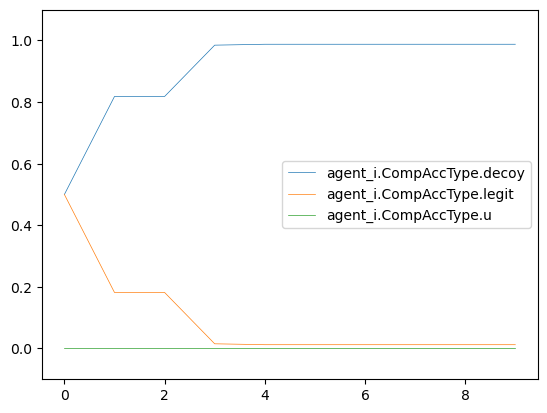

,agent_j.CompAccType.decoy,agent_j.CompAccType.legit,agent_j.CompAccType.u,agent_j.action,agent_i.action,agent_j.observation.EndPtAlerts'
0,1.0,0.0,0.0,EnableSudo,CheckSudo,none
1,1.0,0.0,0.0,Nop,PrivEsc,su_login
2,1.0,0.0,0.0,Nop,FileRecon,file_enum
3,1.0,0.0,0.0,Nop,ManipulateData,file_write
4,1.0,0.0,0.0,Nop,Nop,none
5,1.0,0.0,0.0,Nop,Nop,none
6,1.0,0.0,0.0,Nop,Nop,none
7,1.0,0.0,0.0,Nop,Nop,none
8,1.0,0.0,0.0,Nop,Nop,none
9,1.0,0.0,0.0,Nop,Nop,none


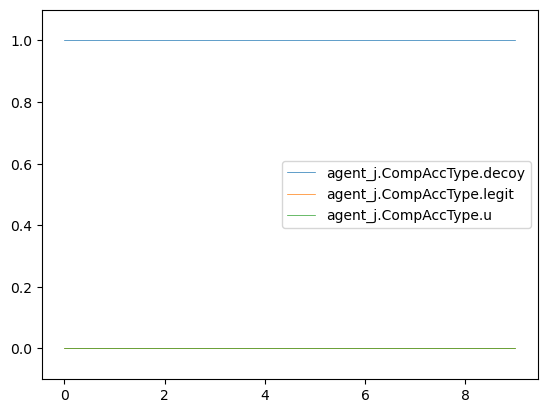

=============DataType============


,state.DataType.decoy,state.DataType.legit,state.DataType.u,agent_i.action,agent_j.action
0,1.0,0.0,0.0,CheckSudo,EnableSudo
1,1.0,0.0,0.0,PrivEsc,Nop
2,1.0,0.0,0.0,FileRecon,Nop
3,1.0,0.0,0.0,ManipulateData,Nop
4,1.0,0.0,0.0,Nop,Nop
5,1.0,0.0,0.0,Nop,Nop
6,1.0,0.0,0.0,Nop,Nop
7,1.0,0.0,0.0,Nop,Nop
8,1.0,0.0,0.0,Nop,Nop
9,1.0,0.0,0.0,Nop,Nop


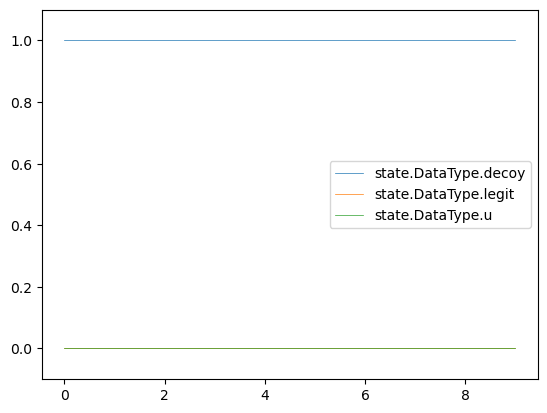

,agent_i.DataType.decoy,agent_i.DataType.legit,agent_i.DataType.u,agent_i.action,agent_j.action,agent_i.observation.ActionResult',agent_i.observation.ConnObs',agent_i.observation.DataTypeObs',agent_i.observation.AccTypeObs'
0,0.500000,0.500000,0.0,CheckSudo,EnableSudo,success,active,legit,decoy
1,0.909091,0.090909,0.0,PrivEsc,Nop,success,active,fake,decoy
2,0.909091,0.090909,0.0,FileRecon,Nop,success,active,fake,decoy
3,0.996960,0.003040,0.0,ManipulateData,Nop,success,inactive,fake,legit
4,0.999918,0.000082,0.0,Nop,Nop,success,inactive,legit,legit
5,0.999918,0.000082,0.0,Nop,Nop,failure,inactive,fake,decoy
6,0.999918,0.000082,0.0,Nop,Nop,success,inactive,legit,legit
7,0.999918,0.000082,0.0,Nop,Nop,failure,inactive,legit,legit
8,0.999918,0.000082,0.0,Nop,Nop,success,inactive,fake,legit
9,0.999918,0.000082,0.0,Nop,Nop,success,inactive,fake,legit


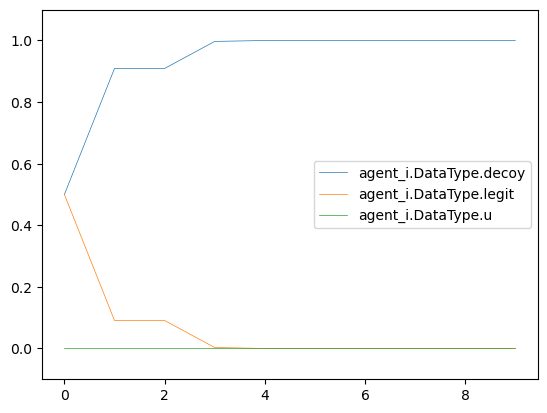

,agent_j.DataType.decoy,agent_j.DataType.legit,agent_j.DataType.u,agent_j.action,agent_i.action,agent_j.observation.EndPtAlerts'
0,1.0,0.0,0.0,EnableSudo,CheckSudo,none
1,1.0,0.0,0.0,Nop,PrivEsc,su_login
2,1.0,0.0,0.0,Nop,FileRecon,file_enum
3,1.0,0.0,0.0,Nop,ManipulateData,file_write
4,1.0,0.0,0.0,Nop,Nop,none
5,1.0,0.0,0.0,Nop,Nop,none
6,1.0,0.0,0.0,Nop,Nop,none
7,1.0,0.0,0.0,Nop,Nop,none
8,1.0,0.0,0.0,Nop,Nop,none
9,1.0,0.0,0.0,Nop,Nop,none


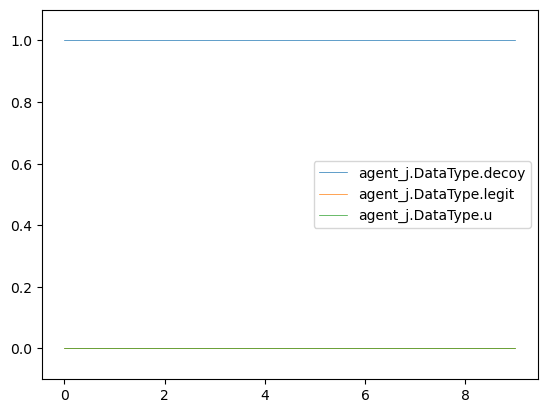

=============DataFound============


,state.DataFound.no,state.DataFound.yes,agent_i.action,agent_j.action
0,1.0,0.0,CheckSudo,EnableSudo
1,1.0,0.0,PrivEsc,Nop
2,1.0,0.0,FileRecon,Nop
3,0.0,1.0,ManipulateData,Nop
4,0.0,1.0,Nop,Nop
5,0.0,1.0,Nop,Nop
6,0.0,1.0,Nop,Nop
7,0.0,1.0,Nop,Nop
8,0.0,1.0,Nop,Nop
9,0.0,1.0,Nop,Nop


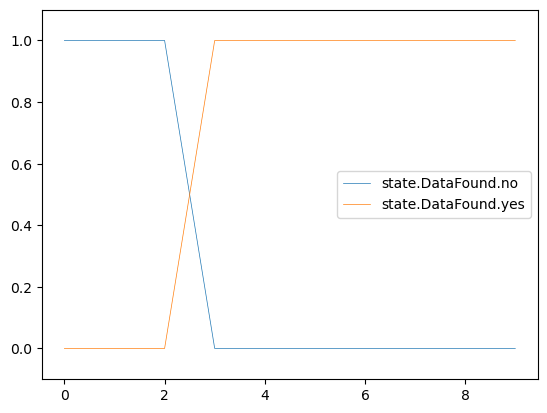

,agent_i.DataFound.no,agent_i.DataFound.yes,agent_i.action,agent_j.action,agent_i.observation.ActionResult',agent_i.observation.ConnObs',agent_i.observation.DataTypeObs',agent_i.observation.AccTypeObs'
0,1.000000,0.000000,CheckSudo,EnableSudo,success,active,legit,decoy
1,1.000000,0.000000,PrivEsc,Nop,success,active,fake,decoy
2,1.000000,0.000000,FileRecon,Nop,success,active,fake,decoy
3,0.027027,0.972973,ManipulateData,Nop,success,inactive,fake,legit
4,0.027107,0.972893,Nop,Nop,success,inactive,legit,legit
5,0.027107,0.972893,Nop,Nop,failure,inactive,fake,decoy
6,0.027107,0.972893,Nop,Nop,success,inactive,legit,legit
7,0.027107,0.972893,Nop,Nop,failure,inactive,legit,legit
8,0.027107,0.972893,Nop,Nop,success,inactive,fake,legit
9,0.027107,0.972893,Nop,Nop,success,inactive,fake,legit


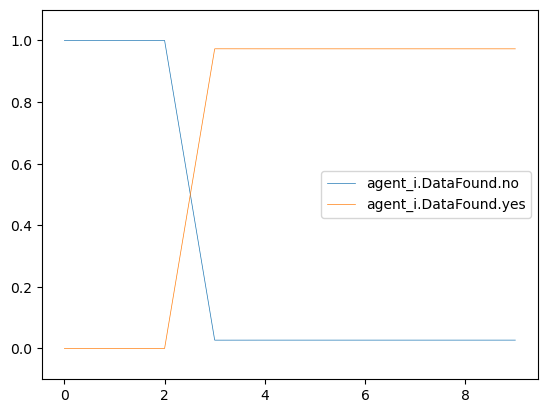

,agent_j.DataFound.no,agent_j.DataFound.yes,agent_j.action,agent_i.action,agent_j.observation.EndPtAlerts'
0,1.000000,0.000000,EnableSudo,CheckSudo,none
1,1.000000,0.000000,Nop,PrivEsc,su_login
2,1.000000,0.000000,Nop,FileRecon,file_enum
3,0.200000,0.800000,Nop,ManipulateData,file_write
4,0.029283,0.970716,Nop,Nop,none
5,0.027041,0.972959,Nop,Nop,none
6,0.027018,0.972982,Nop,Nop,none
7,0.027018,0.972982,Nop,Nop,none
8,0.027018,0.972982,Nop,Nop,none
9,0.027018,0.972982,Nop,Nop,none


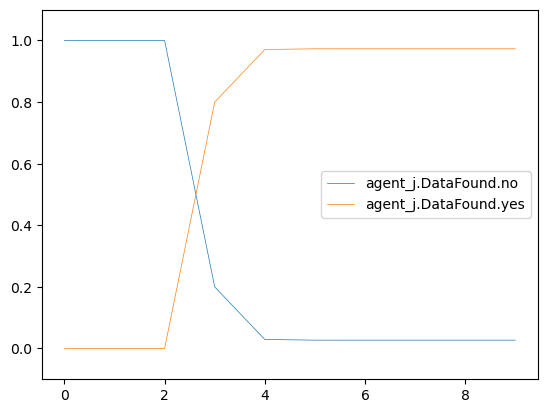

=============AccessLevel============


,state.AccessLevel.root,state.AccessLevel.user,agent_i.action,agent_j.action
0,0.0,1.0,CheckSudo,EnableSudo
1,0.0,1.0,PrivEsc,Nop
2,1.0,0.0,FileRecon,Nop
3,1.0,0.0,ManipulateData,Nop
4,1.0,0.0,Nop,Nop
5,1.0,0.0,Nop,Nop
6,1.0,0.0,Nop,Nop
7,1.0,0.0,Nop,Nop
8,1.0,0.0,Nop,Nop
9,1.0,0.0,Nop,Nop


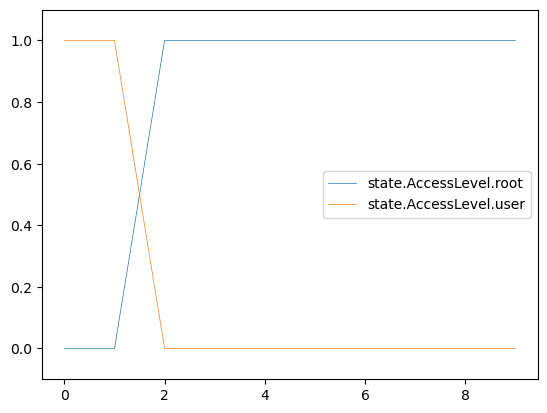

,agent_i.AccessLevel.root,agent_i.AccessLevel.user,agent_i.action,agent_j.action,agent_i.observation.ActionResult',agent_i.observation.ConnObs',agent_i.observation.DataTypeObs',agent_i.observation.AccTypeObs'
0,0.0,1.0,CheckSudo,EnableSudo,success,active,legit,decoy
1,0.0,1.0,PrivEsc,Nop,success,active,fake,decoy
2,1.0,0.0,FileRecon,Nop,success,active,fake,decoy
3,1.0,0.0,ManipulateData,Nop,success,inactive,fake,legit
4,1.0,0.0,Nop,Nop,success,inactive,legit,legit
5,1.0,0.0,Nop,Nop,failure,inactive,fake,decoy
6,1.0,0.0,Nop,Nop,success,inactive,legit,legit
7,1.0,0.0,Nop,Nop,failure,inactive,legit,legit
8,1.0,0.0,Nop,Nop,success,inactive,fake,legit
9,1.0,0.0,Nop,Nop,success,inactive,fake,legit


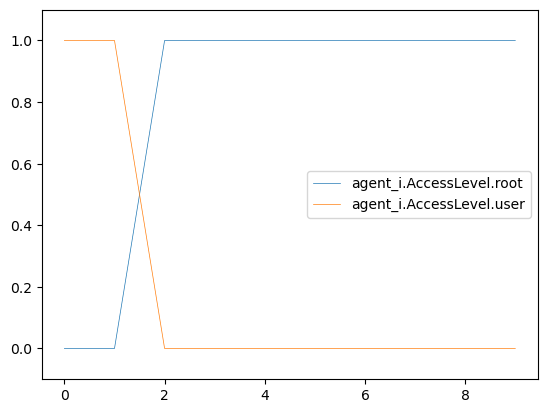

,agent_j.AccessLevel.root,agent_j.AccessLevel.user,agent_j.action,agent_i.action,agent_j.observation.EndPtAlerts'
0,0.0,1.0,EnableSudo,CheckSudo,none
1,0.0,1.0,Nop,PrivEsc,su_login
2,1.0,0.0,Nop,FileRecon,file_enum
3,1.0,0.0,Nop,ManipulateData,file_write
4,1.0,0.0,Nop,Nop,none
5,1.0,0.0,Nop,Nop,none
6,1.0,0.0,Nop,Nop,none
7,1.0,0.0,Nop,Nop,none
8,1.0,0.0,Nop,Nop,none
9,1.0,0.0,Nop,Nop,none


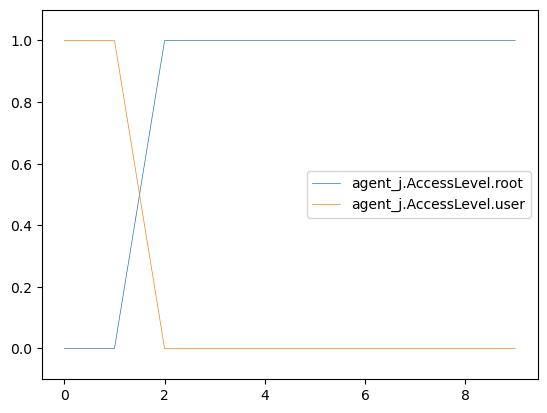

=============SudoAvailable============


,state.SudoAvailable.no,state.SudoAvailable.yes,agent_i.action,agent_j.action
0,1.0,0.0,CheckSudo,EnableSudo
1,0.0,1.0,PrivEsc,Nop
2,0.0,1.0,FileRecon,Nop
3,0.0,1.0,ManipulateData,Nop
4,0.0,1.0,Nop,Nop
5,0.0,1.0,Nop,Nop
6,0.0,1.0,Nop,Nop
7,0.0,1.0,Nop,Nop
8,0.0,1.0,Nop,Nop
9,0.0,1.0,Nop,Nop


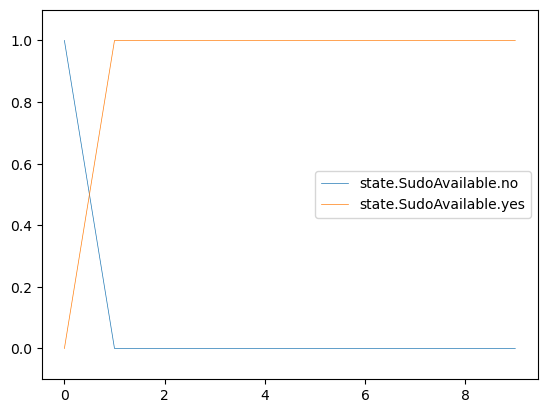

,agent_i.SudoAvailable.no,agent_i.SudoAvailable.yes,agent_i.action,agent_j.action,agent_i.observation.ActionResult',agent_i.observation.ConnObs',agent_i.observation.DataTypeObs',agent_i.observation.AccTypeObs'
0,0.5,0.5,CheckSudo,EnableSudo,success,active,legit,decoy
1,0.0,1.0,PrivEsc,Nop,success,active,fake,decoy
2,0.0,1.0,FileRecon,Nop,success,active,fake,decoy
3,0.0,1.0,ManipulateData,Nop,success,inactive,fake,legit
4,0.0,1.0,Nop,Nop,success,inactive,legit,legit
5,0.0,1.0,Nop,Nop,failure,inactive,fake,decoy
6,0.0,1.0,Nop,Nop,success,inactive,legit,legit
7,0.0,1.0,Nop,Nop,failure,inactive,legit,legit
8,0.0,1.0,Nop,Nop,success,inactive,fake,legit
9,0.0,1.0,Nop,Nop,success,inactive,fake,legit


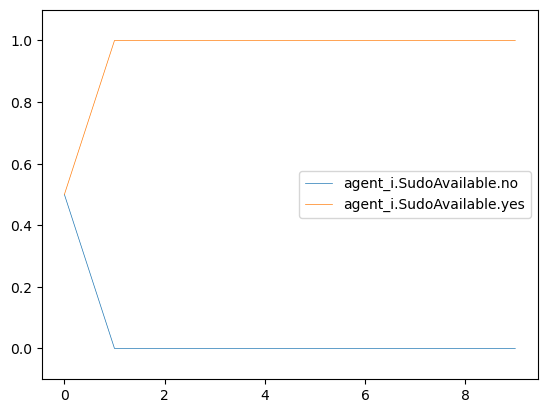

,agent_j.SudoAvailable.no,agent_j.SudoAvailable.yes,agent_j.action,agent_i.action,agent_j.observation.EndPtAlerts'
0,1.0,0.0,EnableSudo,CheckSudo,none
1,0.0,1.0,Nop,PrivEsc,su_login
2,0.0,1.0,Nop,FileRecon,file_enum
3,0.0,1.0,Nop,ManipulateData,file_write
4,0.0,1.0,Nop,Nop,none
5,0.0,1.0,Nop,Nop,none
6,0.0,1.0,Nop,Nop,none
7,0.0,1.0,Nop,Nop,none
8,0.0,1.0,Nop,Nop,none
9,0.0,1.0,Nop,Nop,none


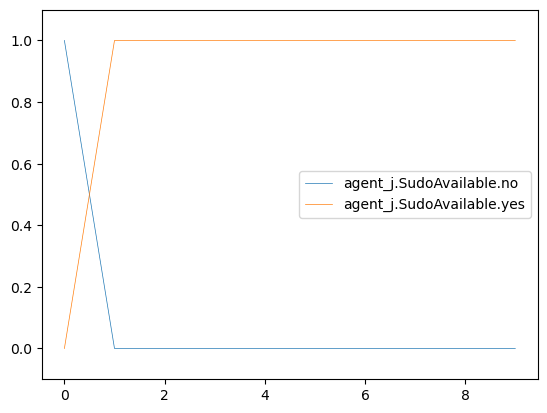

=============DataAccessPol============


,state.DataAccessPol.permissive,state.DataAccessPol.strict,agent_i.action,agent_j.action
0,0.0,1.0,CheckSudo,EnableSudo
1,0.0,1.0,PrivEsc,Nop
2,0.0,1.0,FileRecon,Nop
3,0.0,1.0,ManipulateData,Nop
4,0.0,1.0,Nop,Nop
5,0.0,1.0,Nop,Nop
6,0.0,1.0,Nop,Nop
7,0.0,1.0,Nop,Nop
8,0.0,1.0,Nop,Nop
9,0.0,1.0,Nop,Nop


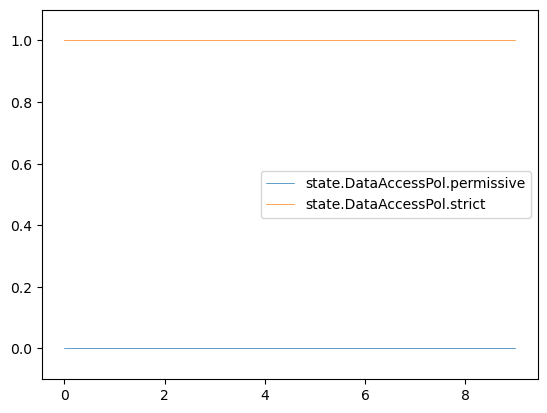

,agent_i.DataAccessPol.permissive,agent_i.DataAccessPol.strict,agent_i.action,agent_j.action,agent_i.observation.ActionResult',agent_i.observation.ConnObs',agent_i.observation.DataTypeObs',agent_i.observation.AccTypeObs'
0,0.0,1.0,CheckSudo,EnableSudo,success,active,legit,decoy
1,0.0,1.0,PrivEsc,Nop,success,active,fake,decoy
2,0.0,1.0,FileRecon,Nop,success,active,fake,decoy
3,0.0,1.0,ManipulateData,Nop,success,inactive,fake,legit
4,0.0,1.0,Nop,Nop,success,inactive,legit,legit
5,0.0,1.0,Nop,Nop,failure,inactive,fake,decoy
6,0.0,1.0,Nop,Nop,success,inactive,legit,legit
7,0.0,1.0,Nop,Nop,failure,inactive,legit,legit
8,0.0,1.0,Nop,Nop,success,inactive,fake,legit
9,0.0,1.0,Nop,Nop,success,inactive,fake,legit


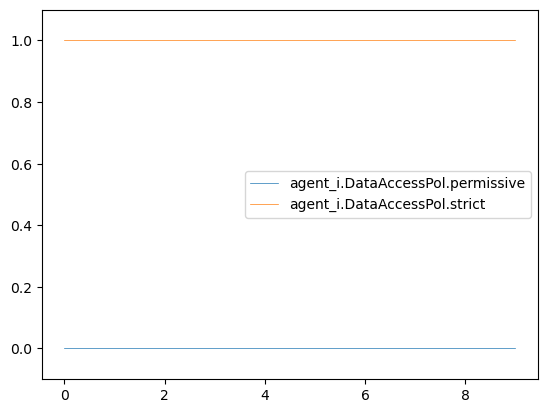

,agent_j.DataAccessPol.permissive,agent_j.DataAccessPol.strict,agent_j.action,agent_i.action,agent_j.observation.EndPtAlerts'
0,0.0,1.0,EnableSudo,CheckSudo,none
1,0.0,1.0,Nop,PrivEsc,su_login
2,0.0,1.0,Nop,FileRecon,file_enum
3,0.0,1.0,Nop,ManipulateData,file_write
4,0.0,1.0,Nop,Nop,none
5,0.0,1.0,Nop,Nop,none
6,0.0,1.0,Nop,Nop,none
7,0.0,1.0,Nop,Nop,none
8,0.0,1.0,Nop,Nop,none
9,0.0,1.0,Nop,Nop,none


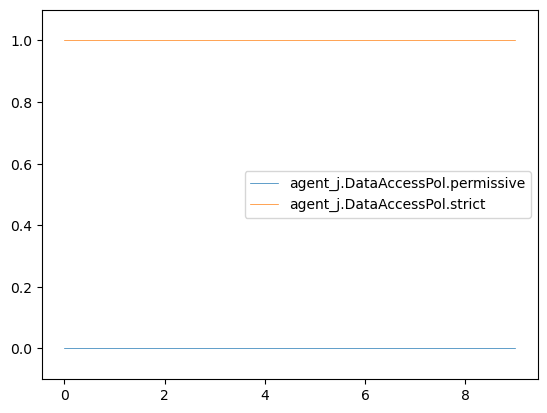

+++++++++++++++++++ End Interaction +++++++++++++++++++
+++++++++++++++++++ Begin Interaction +++++++++++++++++++


,agent_i.thetaj.DefFrame.active,agent_i.thetaj.DefFrame.passive,agent_i.observation.ActionResult',agent_i.observation.ConnObs',agent_i.observation.DataTypeObs',agent_i.observation.AccTypeObs'
0,0.500000,0.500000,success,active,legit,decoy
1,0.818182,0.181818,success,active,fake,decoy
2,0.818182,0.181818,failure,active,fake,decoy
3,0.984802,0.015198,success,active,fake,decoy
4,0.998545,0.001455,failure,inactive,fake,legit
5,0.998629,0.001371,success,inactive,legit,decoy
6,0.998629,0.001371,success,inactive,fake,legit
7,0.998629,0.001371,failure,inactive,legit,decoy
8,0.998629,0.001371,success,inactive,fake,decoy
9,0.998629,0.001371,failure,inactive,fake,decoy


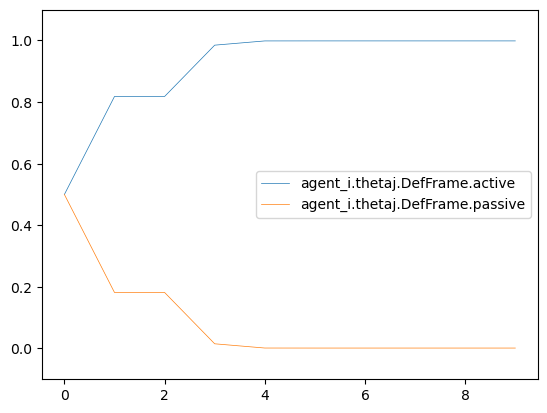

,agent_j.thetaj.AttackerFrame.att,agent_j.observation.EndPtAlerts'
0,1.0,file_write
1,1.0,su_login
2,1.0,file_write
3,1.0,file_enum
4,1.0,file_write
5,1.0,none
6,1.0,none
7,1.0,file_write
8,1.0,none
9,1.0,none


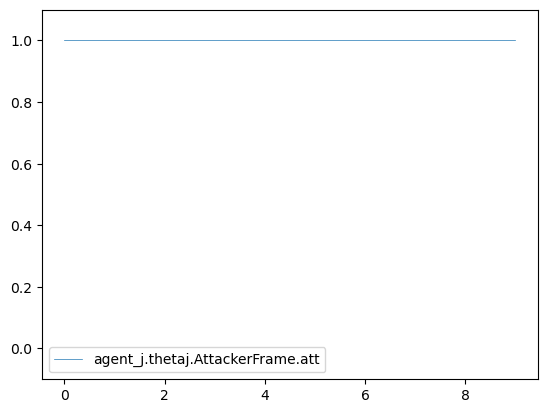

=============AttActive============


,state.AttActive.no,state.AttActive.yes,agent_i.action,agent_j.action
0,0.0,1.0,CheckSudo,EnableSudo
1,0.0,1.0,PrivEsc,Nop
2,0.0,1.0,FileRecon,Nop
3,0.0,1.0,FileRecon,Nop
4,0.0,1.0,ManipulateData,Nop
5,1.0,0.0,Nop,Nop
6,1.0,0.0,Nop,Nop
7,1.0,0.0,Nop,Nop
8,1.0,0.0,Nop,Nop
9,1.0,0.0,Nop,Nop


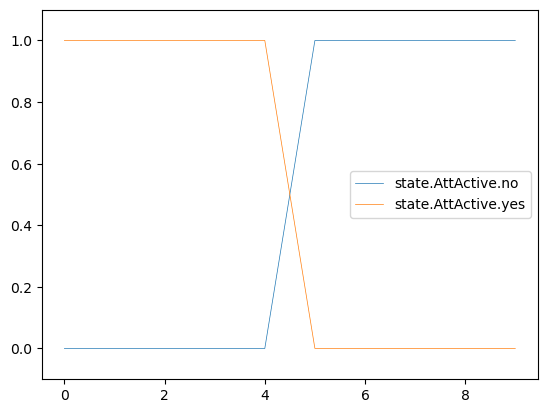

,agent_i.AttActive.no,agent_i.AttActive.yes,agent_i.action,agent_j.action,agent_i.observation.ActionResult',agent_i.observation.ConnObs',agent_i.observation.DataTypeObs',agent_i.observation.AccTypeObs'
0,0.0,1.0,CheckSudo,EnableSudo,success,active,legit,decoy
1,0.0,1.0,PrivEsc,Nop,success,active,fake,decoy
2,0.0,1.0,FileRecon,Nop,failure,active,fake,decoy
3,0.0,1.0,FileRecon,Nop,success,active,fake,decoy
4,0.0,1.0,ManipulateData,Nop,failure,inactive,fake,legit
5,1.0,0.0,Nop,Nop,success,inactive,legit,decoy
6,1.0,0.0,Nop,Nop,success,inactive,fake,legit
7,1.0,0.0,Nop,Nop,failure,inactive,legit,decoy
8,1.0,0.0,Nop,Nop,success,inactive,fake,decoy
9,1.0,0.0,Nop,Nop,failure,inactive,fake,decoy


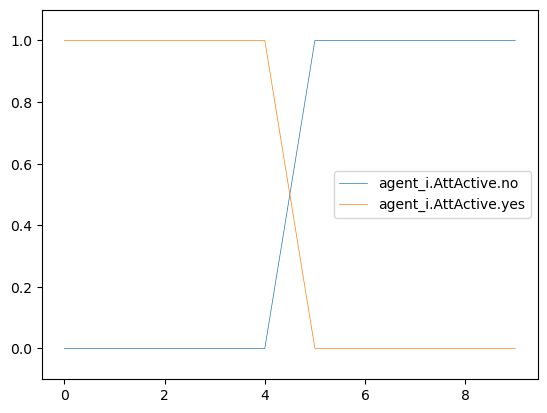

,agent_j.AttActive.no,agent_j.AttActive.yes,agent_j.action,agent_i.action,agent_j.observation.EndPtAlerts'
0,0.000000,1.000000e+00,EnableSudo,CheckSudo,file_write
1,0.000000,1.000000e+00,Nop,PrivEsc,su_login
2,0.000000,9.999999e-01,Nop,FileRecon,file_write
3,0.000000,1.000000e+00,Nop,FileRecon,file_enum
4,0.143411,8.565892e-01,Nop,ManipulateData,file_write
5,0.984722,1.527854e-02,Nop,Nop,none
6,0.999823,1.774447e-04,Nop,Nop,none
7,0.999998,1.957457e-06,Nop,Nop,file_write
8,1.000000,3.601647e-07,Nop,Nop,none
9,1.000000,3.859577e-09,Nop,Nop,none


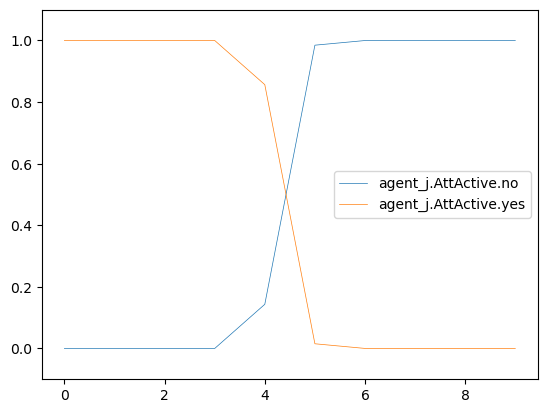

=============CompAccType============


,state.CompAccType.decoy,state.CompAccType.legit,state.CompAccType.u,agent_i.action,agent_j.action
0,1.0,0.0,0.0,CheckSudo,EnableSudo
1,1.0,0.0,0.0,PrivEsc,Nop
2,1.0,0.0,0.0,FileRecon,Nop
3,1.0,0.0,0.0,FileRecon,Nop
4,1.0,0.0,0.0,ManipulateData,Nop
5,1.0,0.0,0.0,Nop,Nop
6,1.0,0.0,0.0,Nop,Nop
7,1.0,0.0,0.0,Nop,Nop
8,1.0,0.0,0.0,Nop,Nop
9,1.0,0.0,0.0,Nop,Nop


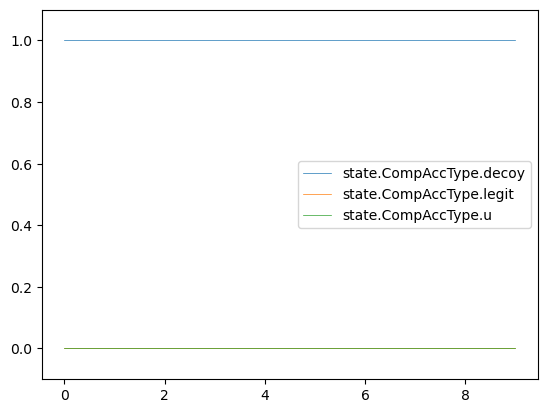

,agent_i.CompAccType.decoy,agent_i.CompAccType.legit,agent_i.CompAccType.u,agent_i.action,agent_j.action,agent_i.observation.ActionResult',agent_i.observation.ConnObs',agent_i.observation.DataTypeObs',agent_i.observation.AccTypeObs'
0,0.500000,0.500000,0.0,CheckSudo,EnableSudo,success,active,legit,decoy
1,0.818182,0.181818,0.0,PrivEsc,Nop,success,active,fake,decoy
2,0.818182,0.181818,0.0,FileRecon,Nop,failure,active,fake,decoy
3,0.984802,0.015198,0.0,FileRecon,Nop,success,active,fake,decoy
4,0.998545,0.001455,0.0,ManipulateData,Nop,failure,inactive,fake,legit
5,0.998629,0.001371,0.0,Nop,Nop,success,inactive,legit,decoy
6,0.998629,0.001371,0.0,Nop,Nop,success,inactive,fake,legit
7,0.998629,0.001371,0.0,Nop,Nop,failure,inactive,legit,decoy
8,0.998629,0.001371,0.0,Nop,Nop,success,inactive,fake,decoy
9,0.998629,0.001371,0.0,Nop,Nop,failure,inactive,fake,decoy


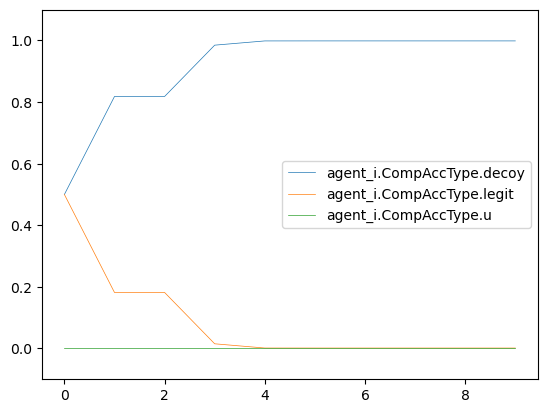

,agent_j.CompAccType.decoy,agent_j.CompAccType.legit,agent_j.CompAccType.u,agent_j.action,agent_i.action,agent_j.observation.EndPtAlerts'
0,1.0,0.0,0.0,EnableSudo,CheckSudo,file_write
1,1.0,0.0,0.0,Nop,PrivEsc,su_login
2,1.0,0.0,0.0,Nop,FileRecon,file_write
3,1.0,0.0,0.0,Nop,FileRecon,file_enum
4,1.0,0.0,0.0,Nop,ManipulateData,file_write
5,1.0,0.0,0.0,Nop,Nop,none
6,1.0,0.0,0.0,Nop,Nop,none
7,1.0,0.0,0.0,Nop,Nop,file_write
8,1.0,0.0,0.0,Nop,Nop,none
9,1.0,0.0,0.0,Nop,Nop,none


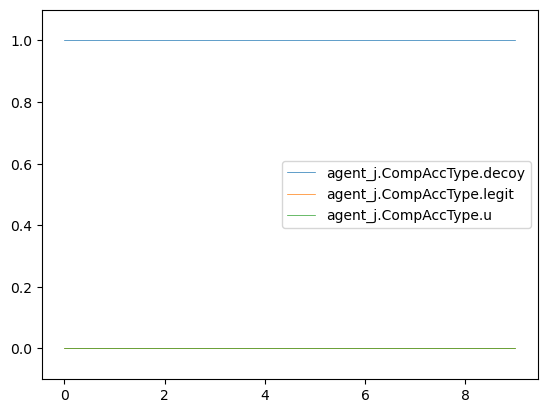

=============DataType============


,state.DataType.decoy,state.DataType.legit,state.DataType.u,agent_i.action,agent_j.action
0,1.0,0.0,0.0,CheckSudo,EnableSudo
1,1.0,0.0,0.0,PrivEsc,Nop
2,1.0,0.0,0.0,FileRecon,Nop
3,1.0,0.0,0.0,FileRecon,Nop
4,1.0,0.0,0.0,ManipulateData,Nop
5,1.0,0.0,0.0,Nop,Nop
6,1.0,0.0,0.0,Nop,Nop
7,1.0,0.0,0.0,Nop,Nop
8,1.0,0.0,0.0,Nop,Nop
9,1.0,0.0,0.0,Nop,Nop


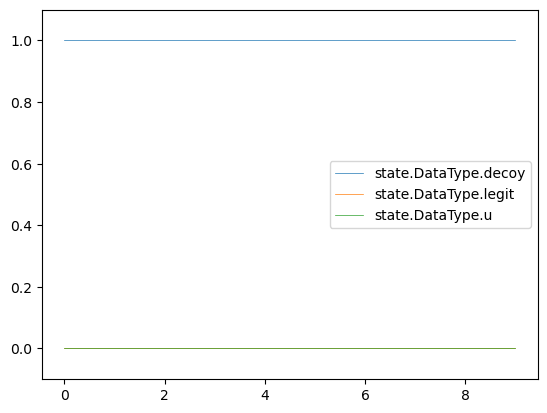

,agent_i.DataType.decoy,agent_i.DataType.legit,agent_i.DataType.u,agent_i.action,agent_j.action,agent_i.observation.ActionResult',agent_i.observation.ConnObs',agent_i.observation.DataTypeObs',agent_i.observation.AccTypeObs'
0,0.500000,0.500000,0.0,CheckSudo,EnableSudo,success,active,legit,decoy
1,0.909091,0.090909,0.0,PrivEsc,Nop,success,active,fake,decoy
2,0.909091,0.090909,0.0,FileRecon,Nop,failure,active,fake,decoy
3,0.996960,0.003040,0.0,FileRecon,Nop,success,active,fake,decoy
4,0.999914,0.000086,0.0,ManipulateData,Nop,failure,inactive,fake,legit
5,0.999999,0.000002,0.0,Nop,Nop,success,inactive,legit,decoy
6,0.999999,0.000002,0.0,Nop,Nop,success,inactive,fake,legit
7,0.999999,0.000002,0.0,Nop,Nop,failure,inactive,legit,decoy
8,0.999999,0.000002,0.0,Nop,Nop,success,inactive,fake,decoy
9,0.999999,0.000002,0.0,Nop,Nop,failure,inactive,fake,decoy


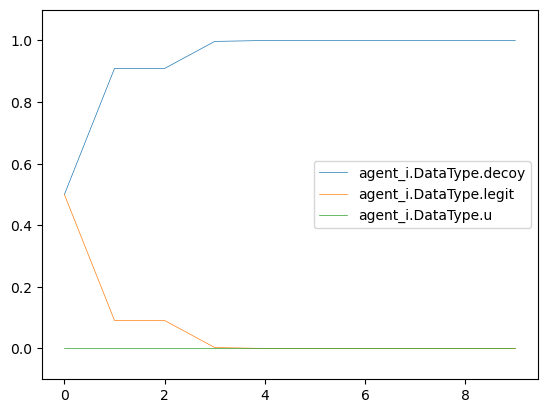

,agent_j.DataType.decoy,agent_j.DataType.legit,agent_j.DataType.u,agent_j.action,agent_i.action,agent_j.observation.EndPtAlerts'
0,1.0,0.0,0.0,EnableSudo,CheckSudo,file_write
1,1.0,0.0,0.0,Nop,PrivEsc,su_login
2,1.0,0.0,0.0,Nop,FileRecon,file_write
3,1.0,0.0,0.0,Nop,FileRecon,file_enum
4,1.0,0.0,0.0,Nop,ManipulateData,file_write
5,1.0,0.0,0.0,Nop,Nop,none
6,1.0,0.0,0.0,Nop,Nop,none
7,1.0,0.0,0.0,Nop,Nop,file_write
8,1.0,0.0,0.0,Nop,Nop,none
9,1.0,0.0,0.0,Nop,Nop,none


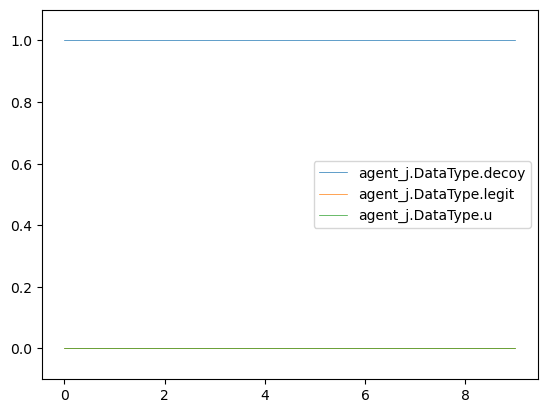

=============DataFound============


,state.DataFound.no,state.DataFound.yes,agent_i.action,agent_j.action
0,1.0,0.0,CheckSudo,EnableSudo
1,1.0,0.0,PrivEsc,Nop
2,1.0,0.0,FileRecon,Nop
3,1.0,0.0,FileRecon,Nop
4,0.0,1.0,ManipulateData,Nop
5,0.0,1.0,Nop,Nop
6,0.0,1.0,Nop,Nop
7,0.0,1.0,Nop,Nop
8,0.0,1.0,Nop,Nop
9,0.0,1.0,Nop,Nop


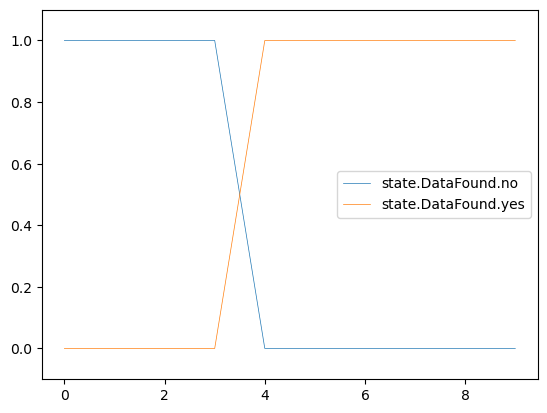

,agent_i.DataFound.no,agent_i.DataFound.yes,agent_i.action,agent_j.action,agent_i.observation.ActionResult',agent_i.observation.ConnObs',agent_i.observation.DataTypeObs',agent_i.observation.AccTypeObs'
0,1.000000,0.000000,CheckSudo,EnableSudo,success,active,legit,decoy
1,1.000000,0.000000,PrivEsc,Nop,success,active,fake,decoy
2,1.000000,0.000000,FileRecon,Nop,failure,active,fake,decoy
3,0.692308,0.307692,FileRecon,Nop,success,active,fake,decoy
4,0.017544,0.982456,ManipulateData,Nop,failure,inactive,fake,legit
5,0.017545,0.982455,Nop,Nop,success,inactive,legit,decoy
6,0.017545,0.982455,Nop,Nop,success,inactive,fake,legit
7,0.017545,0.982455,Nop,Nop,failure,inactive,legit,decoy
8,0.017545,0.982455,Nop,Nop,success,inactive,fake,decoy
9,0.017545,0.982455,Nop,Nop,failure,inactive,fake,decoy


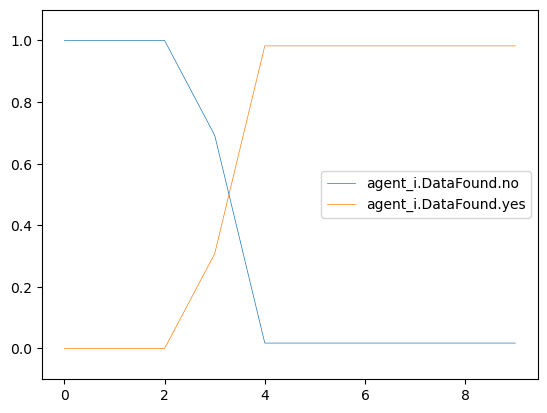

,agent_j.DataFound.no,agent_j.DataFound.yes,agent_j.action,agent_i.action,agent_j.observation.EndPtAlerts'
0,1.000000,0.000000,EnableSudo,CheckSudo,file_write
1,1.000000,0.000000,Nop,PrivEsc,su_login
2,1.000000,0.000000,Nop,FileRecon,file_write
3,0.200000,0.800000,Nop,FileRecon,file_enum
4,0.122481,0.877519,Nop,ManipulateData,file_write
5,0.019198,0.980803,Nop,Nop,none
6,0.017675,0.982325,Nop,Nop,none
7,0.017659,0.982341,Nop,Nop,file_write
8,0.017658,0.982341,Nop,Nop,none
9,0.017658,0.982342,Nop,Nop,none


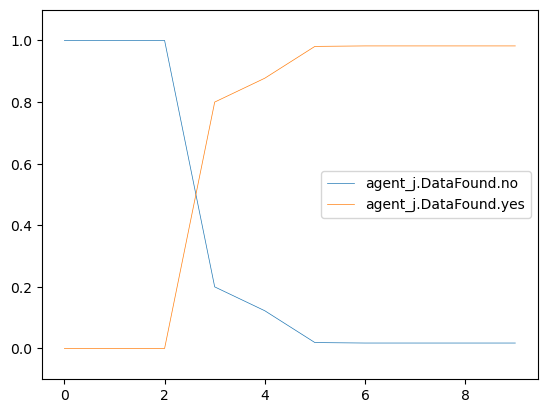

=============AccessLevel============


,state.AccessLevel.root,state.AccessLevel.user,agent_i.action,agent_j.action
0,0.0,1.0,CheckSudo,EnableSudo
1,0.0,1.0,PrivEsc,Nop
2,1.0,0.0,FileRecon,Nop
3,1.0,0.0,FileRecon,Nop
4,1.0,0.0,ManipulateData,Nop
5,1.0,0.0,Nop,Nop
6,1.0,0.0,Nop,Nop
7,1.0,0.0,Nop,Nop
8,1.0,0.0,Nop,Nop
9,1.0,0.0,Nop,Nop


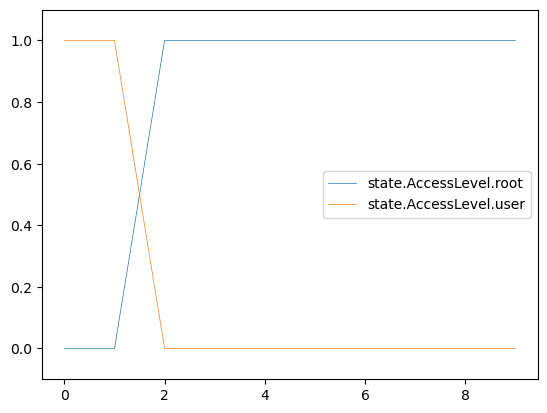

,agent_i.AccessLevel.root,agent_i.AccessLevel.user,agent_i.action,agent_j.action,agent_i.observation.ActionResult',agent_i.observation.ConnObs',agent_i.observation.DataTypeObs',agent_i.observation.AccTypeObs'
0,0.0,1.0,CheckSudo,EnableSudo,success,active,legit,decoy
1,0.0,1.0,PrivEsc,Nop,success,active,fake,decoy
2,1.0,0.0,FileRecon,Nop,failure,active,fake,decoy
3,1.0,0.0,FileRecon,Nop,success,active,fake,decoy
4,1.0,0.0,ManipulateData,Nop,failure,inactive,fake,legit
5,1.0,0.0,Nop,Nop,success,inactive,legit,decoy
6,1.0,0.0,Nop,Nop,success,inactive,fake,legit
7,1.0,0.0,Nop,Nop,failure,inactive,legit,decoy
8,1.0,0.0,Nop,Nop,success,inactive,fake,decoy
9,1.0,0.0,Nop,Nop,failure,inactive,fake,decoy


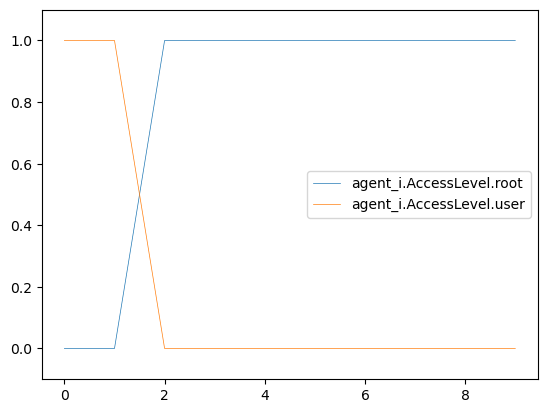

,agent_j.AccessLevel.root,agent_j.AccessLevel.user,agent_j.action,agent_i.action,agent_j.observation.EndPtAlerts'
0,0.0,1.0,EnableSudo,CheckSudo,file_write
1,0.0,1.0,Nop,PrivEsc,su_login
2,1.0,0.0,Nop,FileRecon,file_write
3,1.0,0.0,Nop,FileRecon,file_enum
4,1.0,0.0,Nop,ManipulateData,file_write
5,1.0,0.0,Nop,Nop,none
6,1.0,0.0,Nop,Nop,none
7,1.0,0.0,Nop,Nop,file_write
8,1.0,0.0,Nop,Nop,none
9,1.0,0.0,Nop,Nop,none


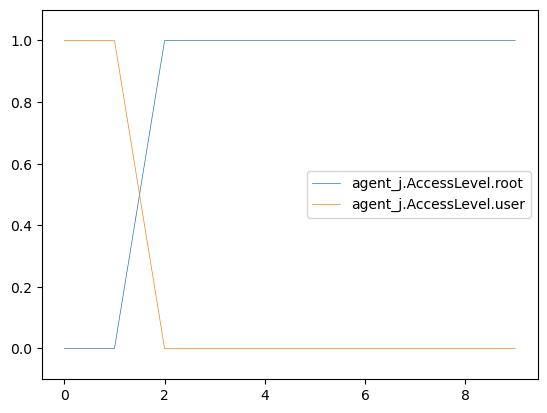

=============SudoAvailable============


,state.SudoAvailable.no,state.SudoAvailable.yes,agent_i.action,agent_j.action
0,1.0,0.0,CheckSudo,EnableSudo
1,0.0,1.0,PrivEsc,Nop
2,0.0,1.0,FileRecon,Nop
3,0.0,1.0,FileRecon,Nop
4,0.0,1.0,ManipulateData,Nop
5,0.0,1.0,Nop,Nop
6,0.0,1.0,Nop,Nop
7,0.0,1.0,Nop,Nop
8,0.0,1.0,Nop,Nop
9,0.0,1.0,Nop,Nop


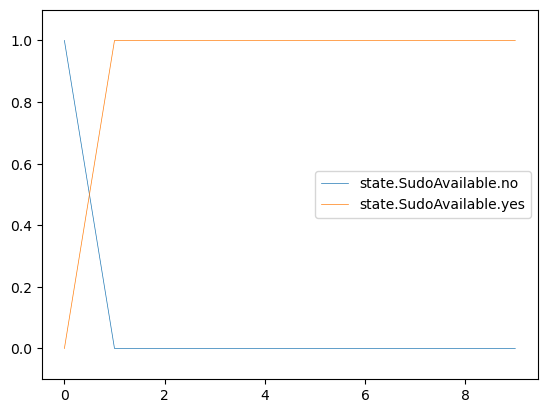

,agent_i.SudoAvailable.no,agent_i.SudoAvailable.yes,agent_i.action,agent_j.action,agent_i.observation.ActionResult',agent_i.observation.ConnObs',agent_i.observation.DataTypeObs',agent_i.observation.AccTypeObs'
0,0.5,0.5,CheckSudo,EnableSudo,success,active,legit,decoy
1,0.0,1.0,PrivEsc,Nop,success,active,fake,decoy
2,0.0,1.0,FileRecon,Nop,failure,active,fake,decoy
3,0.0,1.0,FileRecon,Nop,success,active,fake,decoy
4,0.0,1.0,ManipulateData,Nop,failure,inactive,fake,legit
5,0.0,1.0,Nop,Nop,success,inactive,legit,decoy
6,0.0,1.0,Nop,Nop,success,inactive,fake,legit
7,0.0,1.0,Nop,Nop,failure,inactive,legit,decoy
8,0.0,1.0,Nop,Nop,success,inactive,fake,decoy
9,0.0,1.0,Nop,Nop,failure,inactive,fake,decoy


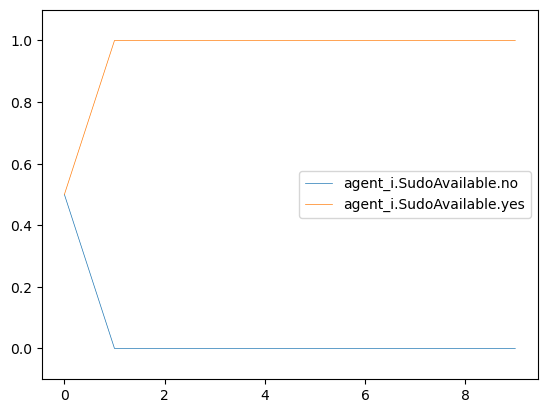

,agent_j.SudoAvailable.no,agent_j.SudoAvailable.yes,agent_j.action,agent_i.action,agent_j.observation.EndPtAlerts'
0,1.0,0.0,EnableSudo,CheckSudo,file_write
1,0.0,1.0,Nop,PrivEsc,su_login
2,0.0,1.0,Nop,FileRecon,file_write
3,0.0,1.0,Nop,FileRecon,file_enum
4,0.0,1.0,Nop,ManipulateData,file_write
5,0.0,1.0,Nop,Nop,none
6,0.0,1.0,Nop,Nop,none
7,0.0,1.0,Nop,Nop,file_write
8,0.0,1.0,Nop,Nop,none
9,0.0,1.0,Nop,Nop,none


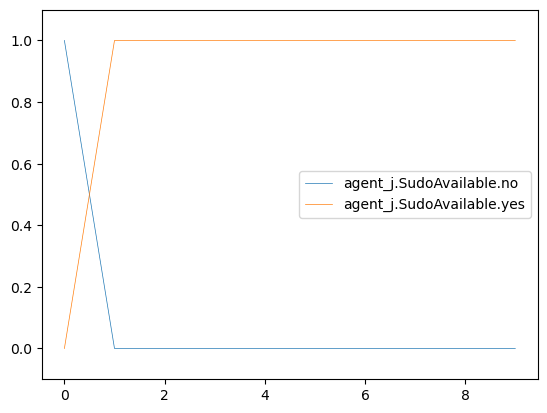

=============DataAccessPol============


,state.DataAccessPol.permissive,state.DataAccessPol.strict,agent_i.action,agent_j.action
0,0.0,1.0,CheckSudo,EnableSudo
1,0.0,1.0,PrivEsc,Nop
2,0.0,1.0,FileRecon,Nop
3,0.0,1.0,FileRecon,Nop
4,0.0,1.0,ManipulateData,Nop
5,0.0,1.0,Nop,Nop
6,0.0,1.0,Nop,Nop
7,0.0,1.0,Nop,Nop
8,0.0,1.0,Nop,Nop
9,0.0,1.0,Nop,Nop


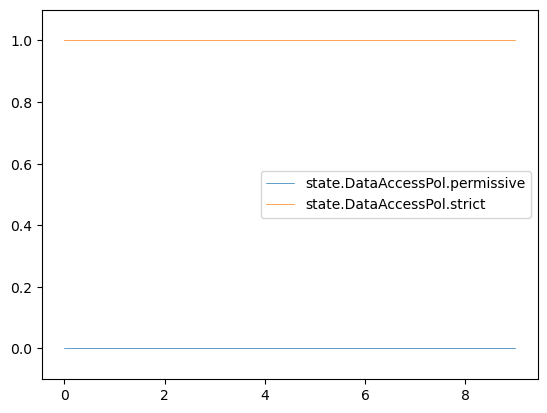

,agent_i.DataAccessPol.permissive,agent_i.DataAccessPol.strict,agent_i.action,agent_j.action,agent_i.observation.ActionResult',agent_i.observation.ConnObs',agent_i.observation.DataTypeObs',agent_i.observation.AccTypeObs'
0,0.0,1.0,CheckSudo,EnableSudo,success,active,legit,decoy
1,0.0,1.0,PrivEsc,Nop,success,active,fake,decoy
2,0.0,1.0,FileRecon,Nop,failure,active,fake,decoy
3,0.0,1.0,FileRecon,Nop,success,active,fake,decoy
4,0.0,1.0,ManipulateData,Nop,failure,inactive,fake,legit
5,0.0,1.0,Nop,Nop,success,inactive,legit,decoy
6,0.0,1.0,Nop,Nop,success,inactive,fake,legit
7,0.0,1.0,Nop,Nop,failure,inactive,legit,decoy
8,0.0,1.0,Nop,Nop,success,inactive,fake,decoy
9,0.0,1.0,Nop,Nop,failure,inactive,fake,decoy


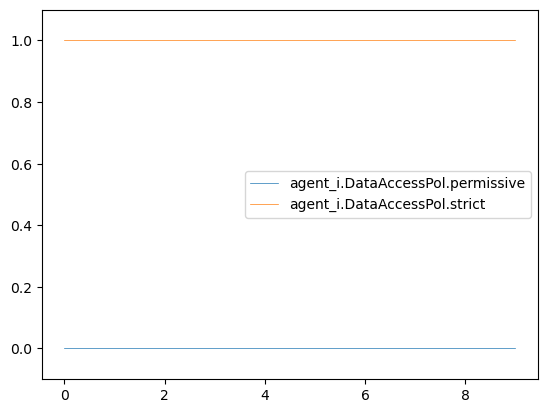

,agent_j.DataAccessPol.permissive,agent_j.DataAccessPol.strict,agent_j.action,agent_i.action,agent_j.observation.EndPtAlerts'
0,0.0,1.0,EnableSudo,CheckSudo,file_write
1,0.0,1.0,Nop,PrivEsc,su_login
2,0.0,1.0,Nop,FileRecon,file_write
3,0.0,1.0,Nop,FileRecon,file_enum
4,0.0,1.0,Nop,ManipulateData,file_write
5,0.0,1.0,Nop,Nop,none
6,0.0,1.0,Nop,Nop,none
7,0.0,1.0,Nop,Nop,file_write
8,0.0,1.0,Nop,Nop,none
9,0.0,1.0,Nop,Nop,none


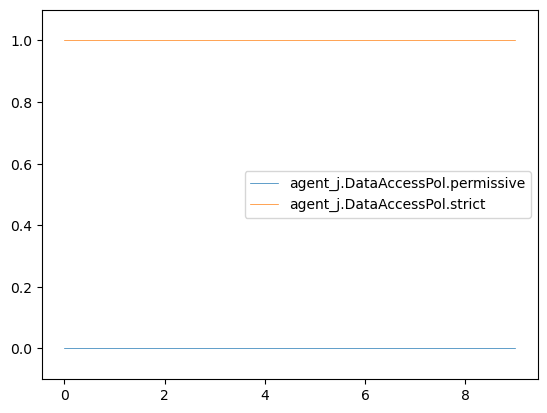

+++++++++++++++++++ End Interaction +++++++++++++++++++
+++++++++++++++++++ Begin Interaction +++++++++++++++++++


,agent_i.thetaj.DefFrame.active,agent_i.thetaj.DefFrame.passive,agent_i.observation.ActionResult',agent_i.observation.ConnObs',agent_i.observation.DataTypeObs',agent_i.observation.AccTypeObs'
0,0.500000,0.500000,success,active,legit,legit
1,0.052632,0.947368,success,active,legit,legit
2,0.052632,0.947368,success,active,fake,decoy
3,0.444444,0.555556,failure,inactive,fake,decoy
4,0.498316,0.501683,success,inactive,legit,legit
5,0.498316,0.501683,failure,inactive,fake,decoy
6,0.498316,0.501683,success,inactive,legit,decoy
7,0.498316,0.501683,success,inactive,fake,legit
8,0.498316,0.501683,success,inactive,legit,legit
9,0.498316,0.501683,failure,inactive,legit,decoy


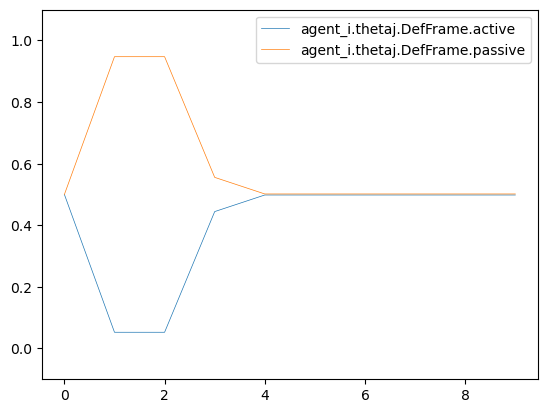

,agent_j.thetaj.AttackerFrame.att,agent_j.observation.EndPtAlerts'
0,1.0,none
1,1.0,su_login
2,1.0,file_enum
3,1.0,file_write
4,1.0,none
5,1.0,none
6,1.0,none
7,1.0,file_write
8,1.0,none
9,1.0,none


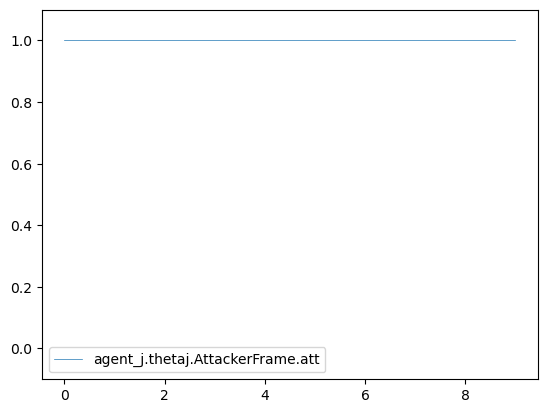

=============AttActive============


,state.AttActive.no,state.AttActive.yes,agent_i.action,agent_j.action
0,0.0,1.0,CheckSudo,EnableSudo
1,0.0,1.0,PrivEsc,Nop
2,0.0,1.0,FileRecon,Nop
3,0.0,1.0,ManipulateData,Nop
4,1.0,0.0,Nop,Nop
5,1.0,0.0,Nop,Nop
6,1.0,0.0,Nop,Nop
7,1.0,0.0,Nop,Nop
8,1.0,0.0,Nop,Nop
9,1.0,0.0,Nop,Nop


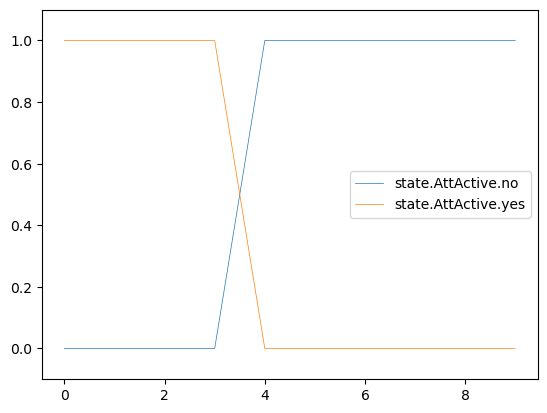

,agent_i.AttActive.no,agent_i.AttActive.yes,agent_i.action,agent_j.action,agent_i.observation.ActionResult',agent_i.observation.ConnObs',agent_i.observation.DataTypeObs',agent_i.observation.AccTypeObs'
0,0.0,1.0,CheckSudo,EnableSudo,success,active,legit,legit
1,0.0,1.0,PrivEsc,Nop,success,active,legit,legit
2,0.0,1.0,FileRecon,Nop,success,active,fake,decoy
3,0.0,1.0,ManipulateData,Nop,failure,inactive,fake,decoy
4,1.0,0.0,Nop,Nop,success,inactive,legit,legit
5,1.0,0.0,Nop,Nop,failure,inactive,fake,decoy
6,1.0,0.0,Nop,Nop,success,inactive,legit,decoy
7,1.0,0.0,Nop,Nop,success,inactive,fake,legit
8,1.0,0.0,Nop,Nop,success,inactive,legit,legit
9,1.0,0.0,Nop,Nop,failure,inactive,legit,decoy


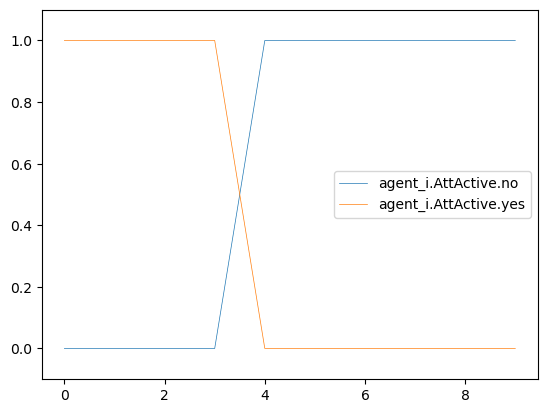

,agent_j.AttActive.no,agent_j.AttActive.yes,agent_j.action,agent_i.action,agent_j.observation.EndPtAlerts'
0,0.000000,1.000000e+00,EnableSudo,CheckSudo,none
1,0.000000,9.999999e-01,Nop,PrivEsc,su_login
2,0.000000,1.000000e+00,Nop,FileRecon,file_enum
3,0.000000,9.999999e-01,Nop,ManipulateData,file_write
4,0.979751,2.024922e-02,Nop,Nop,none
5,0.999744,2.559313e-04,Nop,Nop,none
6,0.999997,2.930344e-06,Nop,Nop,none
7,1.000000,3.232038e-08,Nop,Nop,file_write
8,1.000000,5.946978e-09,Nop,Nop,none
9,1.000000,6.372866e-11,Nop,Nop,none


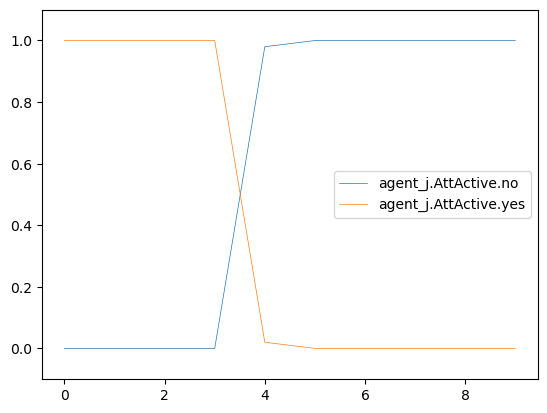

=============CompAccType============


,state.CompAccType.decoy,state.CompAccType.legit,state.CompAccType.u,agent_i.action,agent_j.action
0,1.0,0.0,0.0,CheckSudo,EnableSudo
1,1.0,0.0,0.0,PrivEsc,Nop
2,1.0,0.0,0.0,FileRecon,Nop
3,1.0,0.0,0.0,ManipulateData,Nop
4,1.0,0.0,0.0,Nop,Nop
5,1.0,0.0,0.0,Nop,Nop
6,1.0,0.0,0.0,Nop,Nop
7,1.0,0.0,0.0,Nop,Nop
8,1.0,0.0,0.0,Nop,Nop
9,1.0,0.0,0.0,Nop,Nop


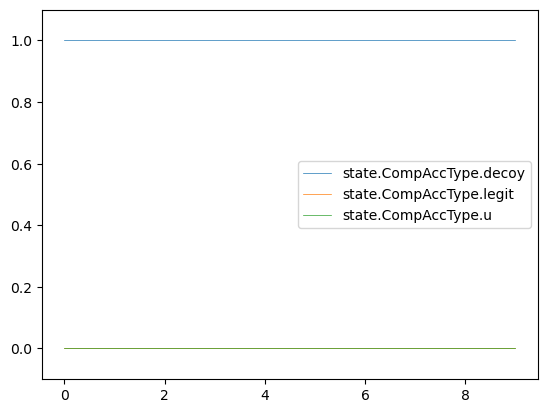

,agent_i.CompAccType.decoy,agent_i.CompAccType.legit,agent_i.CompAccType.u,agent_i.action,agent_j.action,agent_i.observation.ActionResult',agent_i.observation.ConnObs',agent_i.observation.DataTypeObs',agent_i.observation.AccTypeObs'
0,0.500000,0.500000,0.0,CheckSudo,EnableSudo,success,active,legit,legit
1,0.052632,0.947368,0.0,PrivEsc,Nop,success,active,legit,legit
2,0.052632,0.947368,0.0,FileRecon,Nop,success,active,fake,decoy
3,0.444444,0.555556,0.0,ManipulateData,Nop,failure,inactive,fake,decoy
4,0.498316,0.501683,0.0,Nop,Nop,success,inactive,legit,legit
5,0.498316,0.501683,0.0,Nop,Nop,failure,inactive,fake,decoy
6,0.498316,0.501683,0.0,Nop,Nop,success,inactive,legit,decoy
7,0.498316,0.501683,0.0,Nop,Nop,success,inactive,fake,legit
8,0.498316,0.501683,0.0,Nop,Nop,success,inactive,legit,legit
9,0.498316,0.501683,0.0,Nop,Nop,failure,inactive,legit,decoy


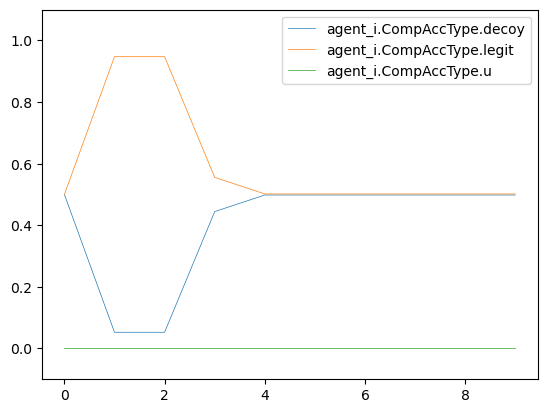

,agent_j.CompAccType.decoy,agent_j.CompAccType.legit,agent_j.CompAccType.u,agent_j.action,agent_i.action,agent_j.observation.EndPtAlerts'
0,1.0,0.0,0.0,EnableSudo,CheckSudo,none
1,1.0,0.0,0.0,Nop,PrivEsc,su_login
2,1.0,0.0,0.0,Nop,FileRecon,file_enum
3,1.0,0.0,0.0,Nop,ManipulateData,file_write
4,1.0,0.0,0.0,Nop,Nop,none
5,1.0,0.0,0.0,Nop,Nop,none
6,1.0,0.0,0.0,Nop,Nop,none
7,1.0,0.0,0.0,Nop,Nop,file_write
8,1.0,0.0,0.0,Nop,Nop,none
9,1.0,0.0,0.0,Nop,Nop,none


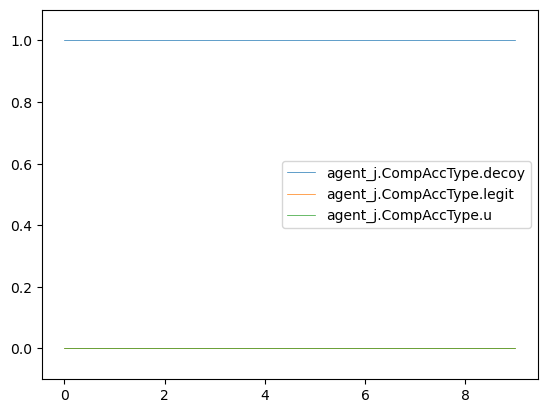

=============DataType============


,state.DataType.decoy,state.DataType.legit,state.DataType.u,agent_i.action,agent_j.action
0,1.0,0.0,0.0,CheckSudo,EnableSudo
1,1.0,0.0,0.0,PrivEsc,Nop
2,1.0,0.0,0.0,FileRecon,Nop
3,1.0,0.0,0.0,ManipulateData,Nop
4,1.0,0.0,0.0,Nop,Nop
5,1.0,0.0,0.0,Nop,Nop
6,1.0,0.0,0.0,Nop,Nop
7,1.0,0.0,0.0,Nop,Nop
8,1.0,0.0,0.0,Nop,Nop
9,1.0,0.0,0.0,Nop,Nop


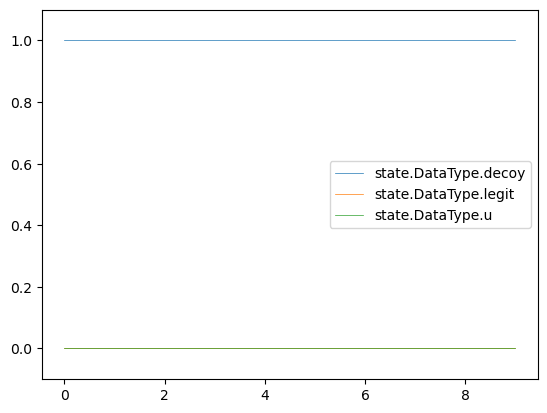

,agent_i.DataType.decoy,agent_i.DataType.legit,agent_i.DataType.u,agent_i.action,agent_j.action,agent_i.observation.ActionResult',agent_i.observation.ConnObs',agent_i.observation.DataTypeObs',agent_i.observation.AccTypeObs'
0,0.500000,0.500000,0.0,CheckSudo,EnableSudo,success,active,legit,legit
1,0.526316,0.473684,0.0,PrivEsc,Nop,success,active,legit,legit
2,0.526316,0.473684,0.0,FileRecon,Nop,success,active,fake,decoy
3,0.888889,0.111111,0.0,ManipulateData,Nop,failure,inactive,fake,decoy
4,0.996633,0.003367,0.0,Nop,Nop,success,inactive,legit,legit
5,0.996633,0.003367,0.0,Nop,Nop,failure,inactive,fake,decoy
6,0.996633,0.003367,0.0,Nop,Nop,success,inactive,legit,decoy
7,0.996633,0.003367,0.0,Nop,Nop,success,inactive,fake,legit
8,0.996633,0.003367,0.0,Nop,Nop,success,inactive,legit,legit
9,0.996633,0.003367,0.0,Nop,Nop,failure,inactive,legit,decoy


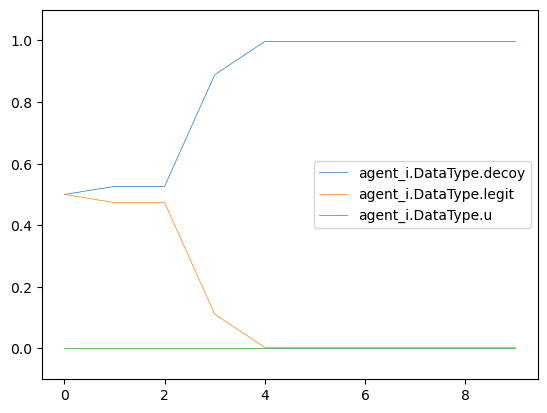

,agent_j.DataType.decoy,agent_j.DataType.legit,agent_j.DataType.u,agent_j.action,agent_i.action,agent_j.observation.EndPtAlerts'
0,1.0,0.0,0.0,EnableSudo,CheckSudo,none
1,1.0,0.0,0.0,Nop,PrivEsc,su_login
2,1.0,0.0,0.0,Nop,FileRecon,file_enum
3,1.0,0.0,0.0,Nop,ManipulateData,file_write
4,1.0,0.0,0.0,Nop,Nop,none
5,1.0,0.0,0.0,Nop,Nop,none
6,1.0,0.0,0.0,Nop,Nop,none
7,1.0,0.0,0.0,Nop,Nop,file_write
8,1.0,0.0,0.0,Nop,Nop,none
9,1.0,0.0,0.0,Nop,Nop,none


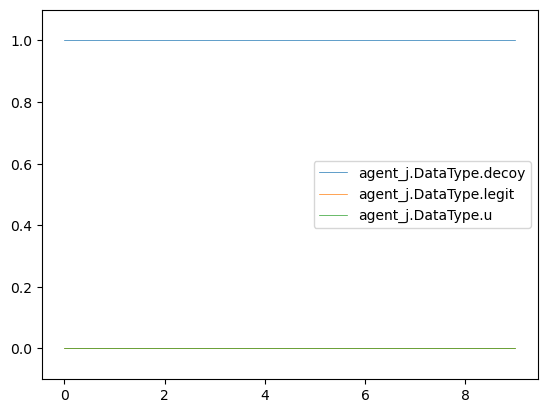

=============DataFound============


,state.DataFound.no,state.DataFound.yes,agent_i.action,agent_j.action
0,1.0,0.0,CheckSudo,EnableSudo
1,1.0,0.0,PrivEsc,Nop
2,1.0,0.0,FileRecon,Nop
3,0.0,1.0,ManipulateData,Nop
4,0.0,1.0,Nop,Nop
5,0.0,1.0,Nop,Nop
6,0.0,1.0,Nop,Nop
7,0.0,1.0,Nop,Nop
8,0.0,1.0,Nop,Nop
9,0.0,1.0,Nop,Nop


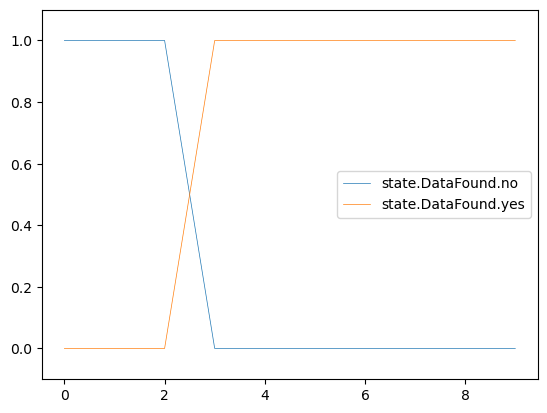

,agent_i.DataFound.no,agent_i.DataFound.yes,agent_i.action,agent_j.action,agent_i.observation.ActionResult',agent_i.observation.ConnObs',agent_i.observation.DataTypeObs',agent_i.observation.AccTypeObs'
0,1.000000,0.000000,CheckSudo,EnableSudo,success,active,legit,legit
1,1.000000,0.000000,PrivEsc,Nop,success,active,legit,legit
2,1.000000,0.000000,FileRecon,Nop,success,active,fake,decoy
3,0.027027,0.972973,ManipulateData,Nop,failure,inactive,fake,decoy
4,0.030303,0.969697,Nop,Nop,success,inactive,legit,legit
5,0.030303,0.969697,Nop,Nop,failure,inactive,fake,decoy
6,0.030303,0.969697,Nop,Nop,success,inactive,legit,decoy
7,0.030303,0.969697,Nop,Nop,success,inactive,fake,legit
8,0.030303,0.969697,Nop,Nop,success,inactive,legit,legit
9,0.030303,0.969697,Nop,Nop,failure,inactive,legit,decoy


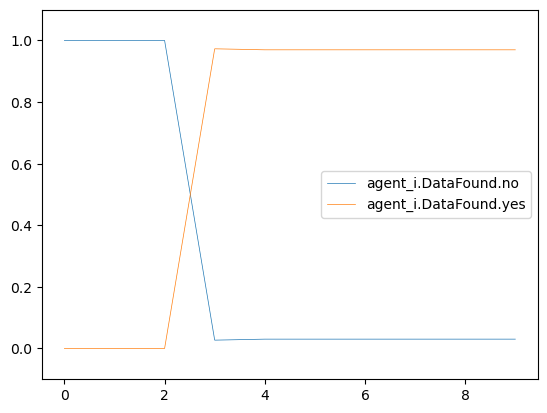

,agent_j.DataFound.no,agent_j.DataFound.yes,agent_j.action,agent_i.action,agent_j.observation.EndPtAlerts'
0,1.000000,0.000000,EnableSudo,CheckSudo,none
1,1.000000,0.000000,Nop,PrivEsc,su_login
2,1.000000,0.000000,Nop,FileRecon,file_enum
3,0.200000,0.800000,Nop,ManipulateData,file_write
4,0.029283,0.970716,Nop,Nop,none
5,0.027041,0.972959,Nop,Nop,none
6,0.027018,0.972982,Nop,Nop,none
7,0.027018,0.972982,Nop,Nop,file_write
8,0.027018,0.972982,Nop,Nop,none
9,0.027018,0.972982,Nop,Nop,none


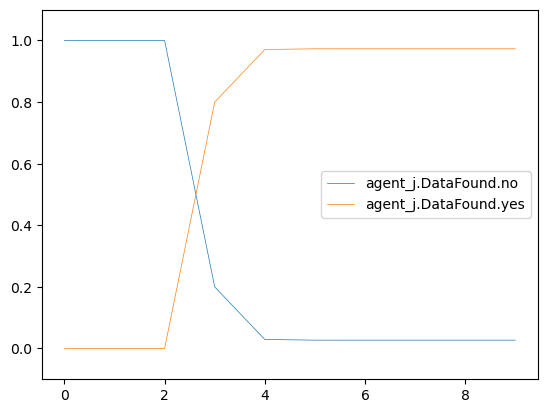

=============AccessLevel============


,state.AccessLevel.root,state.AccessLevel.user,agent_i.action,agent_j.action
0,0.0,1.0,CheckSudo,EnableSudo
1,0.0,1.0,PrivEsc,Nop
2,1.0,0.0,FileRecon,Nop
3,1.0,0.0,ManipulateData,Nop
4,1.0,0.0,Nop,Nop
5,1.0,0.0,Nop,Nop
6,1.0,0.0,Nop,Nop
7,1.0,0.0,Nop,Nop
8,1.0,0.0,Nop,Nop
9,1.0,0.0,Nop,Nop


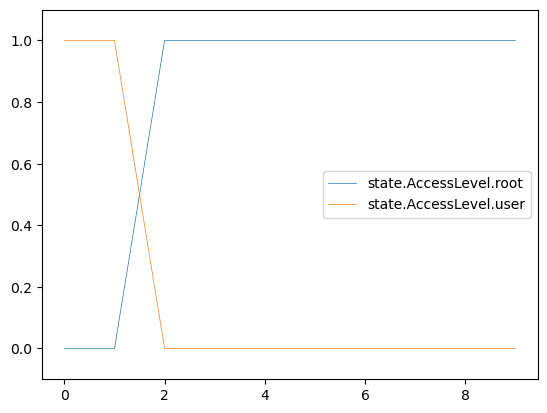

,agent_i.AccessLevel.root,agent_i.AccessLevel.user,agent_i.action,agent_j.action,agent_i.observation.ActionResult',agent_i.observation.ConnObs',agent_i.observation.DataTypeObs',agent_i.observation.AccTypeObs'
0,0.0,1.0,CheckSudo,EnableSudo,success,active,legit,legit
1,0.0,1.0,PrivEsc,Nop,success,active,legit,legit
2,1.0,0.0,FileRecon,Nop,success,active,fake,decoy
3,1.0,0.0,ManipulateData,Nop,failure,inactive,fake,decoy
4,1.0,0.0,Nop,Nop,success,inactive,legit,legit
5,1.0,0.0,Nop,Nop,failure,inactive,fake,decoy
6,1.0,0.0,Nop,Nop,success,inactive,legit,decoy
7,1.0,0.0,Nop,Nop,success,inactive,fake,legit
8,1.0,0.0,Nop,Nop,success,inactive,legit,legit
9,1.0,0.0,Nop,Nop,failure,inactive,legit,decoy


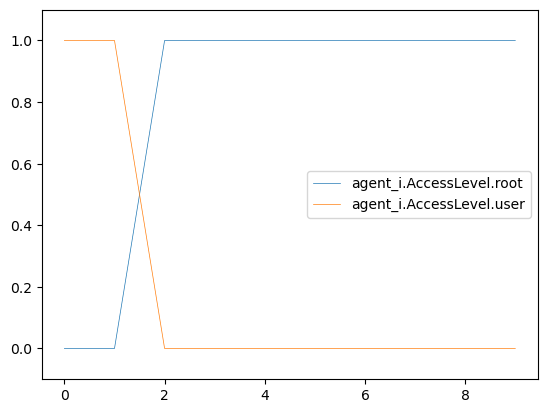

,agent_j.AccessLevel.root,agent_j.AccessLevel.user,agent_j.action,agent_i.action,agent_j.observation.EndPtAlerts'
0,0.0,1.0,EnableSudo,CheckSudo,none
1,0.0,1.0,Nop,PrivEsc,su_login
2,1.0,0.0,Nop,FileRecon,file_enum
3,1.0,0.0,Nop,ManipulateData,file_write
4,1.0,0.0,Nop,Nop,none
5,1.0,0.0,Nop,Nop,none
6,1.0,0.0,Nop,Nop,none
7,1.0,0.0,Nop,Nop,file_write
8,1.0,0.0,Nop,Nop,none
9,1.0,0.0,Nop,Nop,none


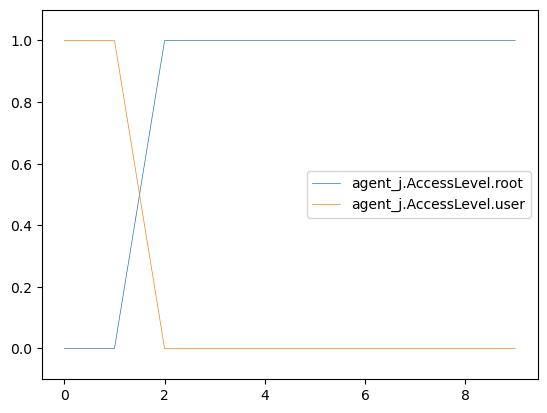

=============SudoAvailable============


,state.SudoAvailable.no,state.SudoAvailable.yes,agent_i.action,agent_j.action
0,1.0,0.0,CheckSudo,EnableSudo
1,0.0,1.0,PrivEsc,Nop
2,0.0,1.0,FileRecon,Nop
3,0.0,1.0,ManipulateData,Nop
4,0.0,1.0,Nop,Nop
5,0.0,1.0,Nop,Nop
6,0.0,1.0,Nop,Nop
7,0.0,1.0,Nop,Nop
8,0.0,1.0,Nop,Nop
9,0.0,1.0,Nop,Nop


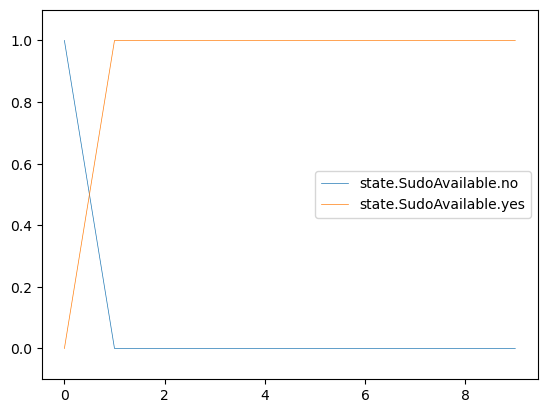

,agent_i.SudoAvailable.no,agent_i.SudoAvailable.yes,agent_i.action,agent_j.action,agent_i.observation.ActionResult',agent_i.observation.ConnObs',agent_i.observation.DataTypeObs',agent_i.observation.AccTypeObs'
0,0.5,0.5,CheckSudo,EnableSudo,success,active,legit,legit
1,0.0,1.0,PrivEsc,Nop,success,active,legit,legit
2,0.0,1.0,FileRecon,Nop,success,active,fake,decoy
3,0.0,1.0,ManipulateData,Nop,failure,inactive,fake,decoy
4,0.0,1.0,Nop,Nop,success,inactive,legit,legit
5,0.0,1.0,Nop,Nop,failure,inactive,fake,decoy
6,0.0,1.0,Nop,Nop,success,inactive,legit,decoy
7,0.0,1.0,Nop,Nop,success,inactive,fake,legit
8,0.0,1.0,Nop,Nop,success,inactive,legit,legit
9,0.0,1.0,Nop,Nop,failure,inactive,legit,decoy


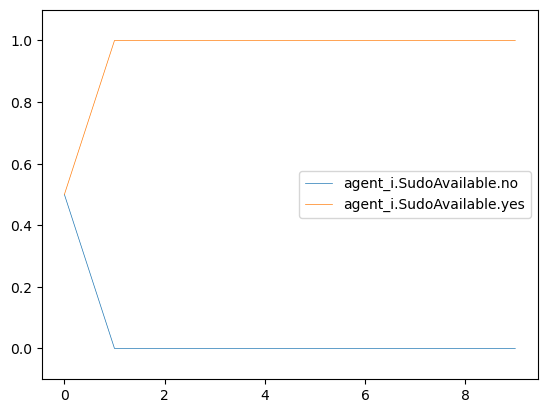

,agent_j.SudoAvailable.no,agent_j.SudoAvailable.yes,agent_j.action,agent_i.action,agent_j.observation.EndPtAlerts'
0,1.0,0.0,EnableSudo,CheckSudo,none
1,0.0,1.0,Nop,PrivEsc,su_login
2,0.0,1.0,Nop,FileRecon,file_enum
3,0.0,1.0,Nop,ManipulateData,file_write
4,0.0,1.0,Nop,Nop,none
5,0.0,1.0,Nop,Nop,none
6,0.0,1.0,Nop,Nop,none
7,0.0,1.0,Nop,Nop,file_write
8,0.0,1.0,Nop,Nop,none
9,0.0,1.0,Nop,Nop,none


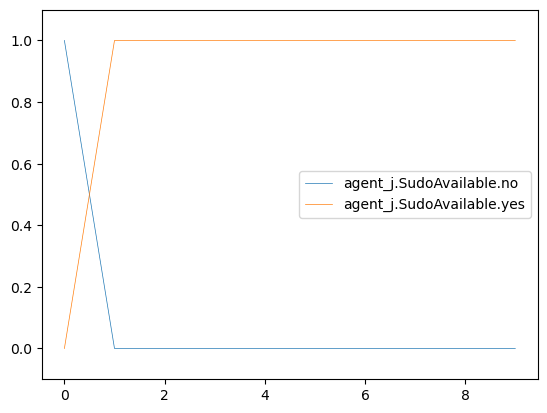

=============DataAccessPol============


,state.DataAccessPol.permissive,state.DataAccessPol.strict,agent_i.action,agent_j.action
0,0.0,1.0,CheckSudo,EnableSudo
1,0.0,1.0,PrivEsc,Nop
2,0.0,1.0,FileRecon,Nop
3,0.0,1.0,ManipulateData,Nop
4,0.0,1.0,Nop,Nop
5,0.0,1.0,Nop,Nop
6,0.0,1.0,Nop,Nop
7,0.0,1.0,Nop,Nop
8,0.0,1.0,Nop,Nop
9,0.0,1.0,Nop,Nop


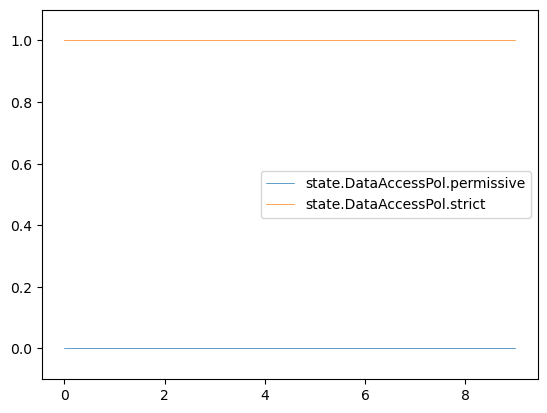

,agent_i.DataAccessPol.permissive,agent_i.DataAccessPol.strict,agent_i.action,agent_j.action,agent_i.observation.ActionResult',agent_i.observation.ConnObs',agent_i.observation.DataTypeObs',agent_i.observation.AccTypeObs'
0,0.0,1.0,CheckSudo,EnableSudo,success,active,legit,legit
1,0.0,1.0,PrivEsc,Nop,success,active,legit,legit
2,0.0,1.0,FileRecon,Nop,success,active,fake,decoy
3,0.0,1.0,ManipulateData,Nop,failure,inactive,fake,decoy
4,0.0,1.0,Nop,Nop,success,inactive,legit,legit
5,0.0,1.0,Nop,Nop,failure,inactive,fake,decoy
6,0.0,1.0,Nop,Nop,success,inactive,legit,decoy
7,0.0,1.0,Nop,Nop,success,inactive,fake,legit
8,0.0,1.0,Nop,Nop,success,inactive,legit,legit
9,0.0,1.0,Nop,Nop,failure,inactive,legit,decoy


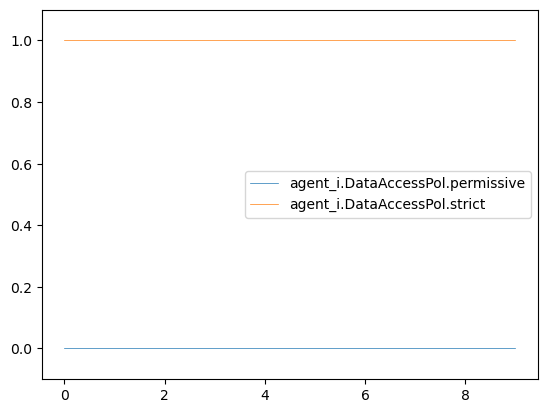

,agent_j.DataAccessPol.permissive,agent_j.DataAccessPol.strict,agent_j.action,agent_i.action,agent_j.observation.EndPtAlerts'
0,0.0,1.0,EnableSudo,CheckSudo,none
1,0.0,1.0,Nop,PrivEsc,su_login
2,0.0,1.0,Nop,FileRecon,file_enum
3,0.0,1.0,Nop,ManipulateData,file_write
4,0.0,1.0,Nop,Nop,none
5,0.0,1.0,Nop,Nop,none
6,0.0,1.0,Nop,Nop,none
7,0.0,1.0,Nop,Nop,file_write
8,0.0,1.0,Nop,Nop,none
9,0.0,1.0,Nop,Nop,none


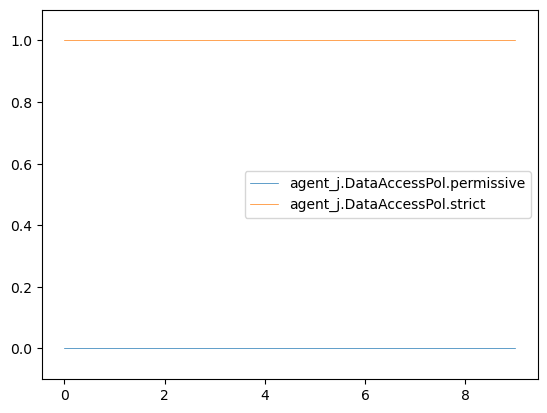

+++++++++++++++++++ End Interaction +++++++++++++++++++
+++++++++++++++++++ Begin Interaction +++++++++++++++++++


,agent_i.thetaj.DefFrame.active,agent_i.thetaj.DefFrame.passive,agent_i.observation.ActionResult',agent_i.observation.ConnObs',agent_i.observation.DataTypeObs',agent_i.observation.AccTypeObs'
0,0.500000,0.500000,success,active,legit,decoy
1,0.818182,0.181818,success,active,legit,legit
2,0.818182,0.181818,success,active,fake,legit
3,0.444444,0.555555,failure,inactive,fake,decoy
4,0.498317,0.501684,success,inactive,legit,legit
5,0.498316,0.501683,failure,inactive,fake,legit
6,0.498316,0.501683,failure,inactive,fake,decoy
7,0.498316,0.501683,success,inactive,fake,legit
8,0.498316,0.501683,success,inactive,fake,legit
9,0.498316,0.501683,failure,inactive,fake,legit


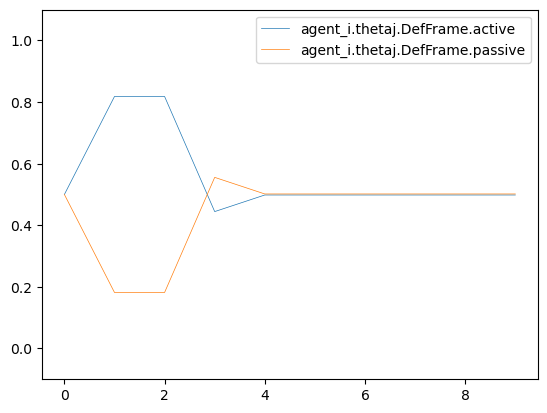

,agent_j.thetaj.AttackerFrame.att,agent_j.observation.EndPtAlerts'
0,1.0,none
1,1.0,su_login
2,1.0,file_enum
3,1.0,none
4,1.0,none
5,1.0,su_login
6,1.0,none
7,1.0,none
8,1.0,su_login
9,1.0,none


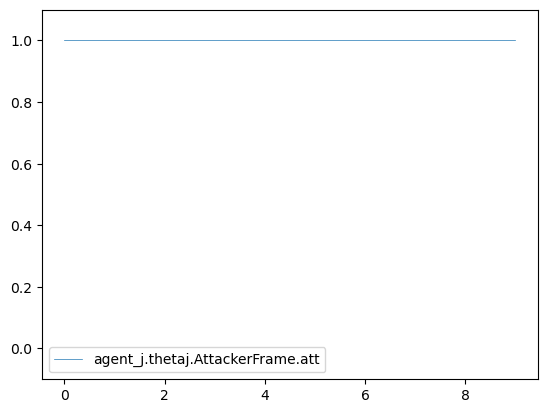

=============AttActive============


,state.AttActive.no,state.AttActive.yes,agent_i.action,agent_j.action
0,0.0,1.0,CheckSudo,EnableSudo
1,0.0,1.0,PrivEsc,Nop
2,0.0,1.0,FileRecon,Nop
3,0.0,1.0,ManipulateData,Nop
4,1.0,0.0,Nop,Nop
5,1.0,0.0,Nop,Nop
6,1.0,0.0,Nop,Nop
7,1.0,0.0,Nop,Nop
8,1.0,0.0,Nop,Nop
9,1.0,0.0,Nop,Nop


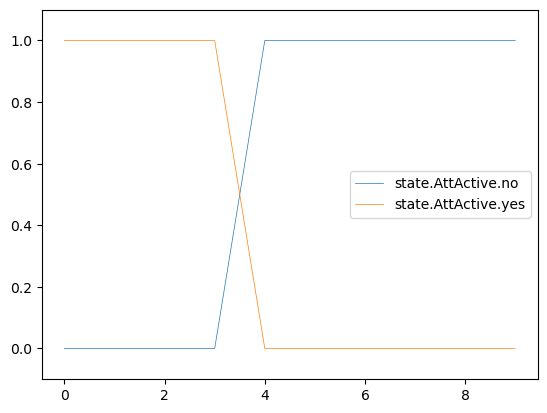

,agent_i.AttActive.no,agent_i.AttActive.yes,agent_i.action,agent_j.action,agent_i.observation.ActionResult',agent_i.observation.ConnObs',agent_i.observation.DataTypeObs',agent_i.observation.AccTypeObs'
0,0.0,1.0,CheckSudo,EnableSudo,success,active,legit,decoy
1,0.0,1.0,PrivEsc,Nop,success,active,legit,legit
2,0.0,1.0,FileRecon,Nop,success,active,fake,legit
3,0.0,1.0,ManipulateData,Nop,failure,inactive,fake,decoy
4,1.0,0.0,Nop,Nop,success,inactive,legit,legit
5,1.0,0.0,Nop,Nop,failure,inactive,fake,legit
6,1.0,0.0,Nop,Nop,failure,inactive,fake,decoy
7,1.0,0.0,Nop,Nop,success,inactive,fake,legit
8,1.0,0.0,Nop,Nop,success,inactive,fake,legit
9,1.0,0.0,Nop,Nop,failure,inactive,fake,legit


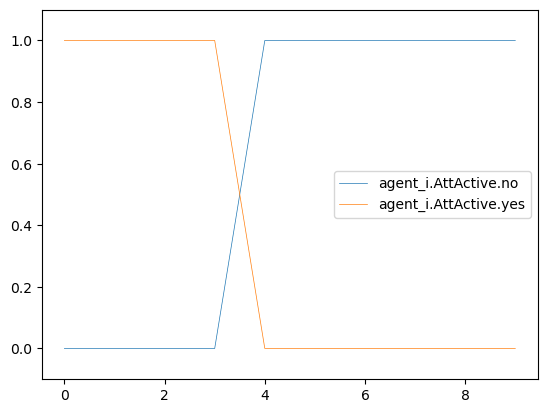

,agent_j.AttActive.no,agent_j.AttActive.yes,agent_j.action,agent_i.action,agent_j.observation.EndPtAlerts'
0,0.000000,1.000000e+00,EnableSudo,CheckSudo,none
1,0.000000,9.999999e-01,Nop,PrivEsc,su_login
2,0.000000,1.000000e+00,Nop,FileRecon,file_enum
3,0.000000,9.999999e-01,Nop,ManipulateData,none
4,0.740000,2.600000e-01,Nop,Nop,none
5,0.995732,4.267912e-03,Nop,Nop,su_login
6,0.999169,8.305296e-04,Nop,Nop,none
7,0.999991,9.167511e-06,Nop,Nop,none
8,1.000000,9.922619e-08,Nop,Nop,su_login
9,1.000000,1.807647e-08,Nop,Nop,none


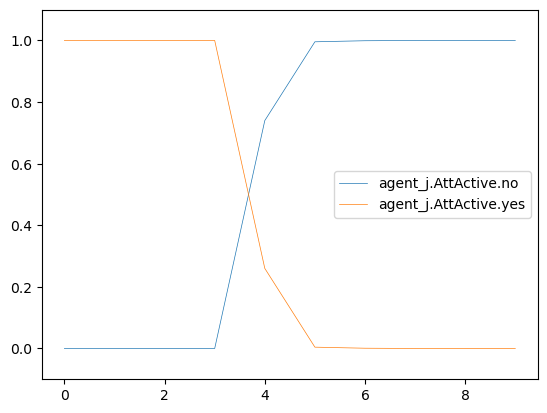

=============CompAccType============


,state.CompAccType.decoy,state.CompAccType.legit,state.CompAccType.u,agent_i.action,agent_j.action
0,1.0,0.0,0.0,CheckSudo,EnableSudo
1,1.0,0.0,0.0,PrivEsc,Nop
2,1.0,0.0,0.0,FileRecon,Nop
3,1.0,0.0,0.0,ManipulateData,Nop
4,1.0,0.0,0.0,Nop,Nop
5,1.0,0.0,0.0,Nop,Nop
6,1.0,0.0,0.0,Nop,Nop
7,1.0,0.0,0.0,Nop,Nop
8,1.0,0.0,0.0,Nop,Nop
9,1.0,0.0,0.0,Nop,Nop


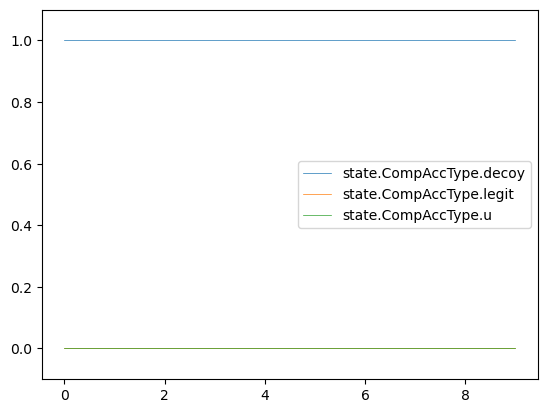

,agent_i.CompAccType.decoy,agent_i.CompAccType.legit,agent_i.CompAccType.u,agent_i.action,agent_j.action,agent_i.observation.ActionResult',agent_i.observation.ConnObs',agent_i.observation.DataTypeObs',agent_i.observation.AccTypeObs'
0,0.500000,0.500000,0.0,CheckSudo,EnableSudo,success,active,legit,decoy
1,0.818182,0.181818,0.0,PrivEsc,Nop,success,active,legit,legit
2,0.818182,0.181818,0.0,FileRecon,Nop,success,active,fake,legit
3,0.444444,0.555555,0.0,ManipulateData,Nop,failure,inactive,fake,decoy
4,0.498317,0.501684,0.0,Nop,Nop,success,inactive,legit,legit
5,0.498316,0.501683,0.0,Nop,Nop,failure,inactive,fake,legit
6,0.498316,0.501683,0.0,Nop,Nop,failure,inactive,fake,decoy
7,0.498316,0.501683,0.0,Nop,Nop,success,inactive,fake,legit
8,0.498316,0.501683,0.0,Nop,Nop,success,inactive,fake,legit
9,0.498316,0.501683,0.0,Nop,Nop,failure,inactive,fake,legit


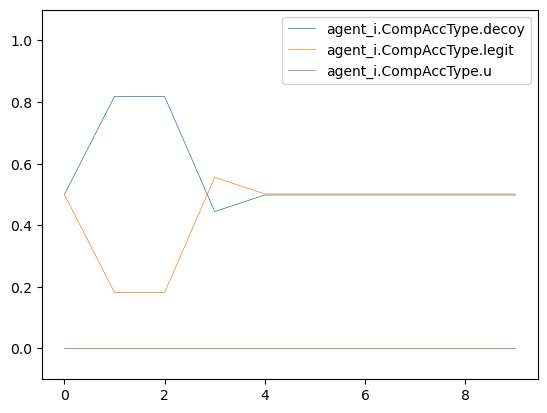

,agent_j.CompAccType.decoy,agent_j.CompAccType.legit,agent_j.CompAccType.u,agent_j.action,agent_i.action,agent_j.observation.EndPtAlerts'
0,1.0,0.0,0.0,EnableSudo,CheckSudo,none
1,1.0,0.0,0.0,Nop,PrivEsc,su_login
2,1.0,0.0,0.0,Nop,FileRecon,file_enum
3,1.0,0.0,0.0,Nop,ManipulateData,none
4,1.0,0.0,0.0,Nop,Nop,none
5,1.0,0.0,0.0,Nop,Nop,su_login
6,1.0,0.0,0.0,Nop,Nop,none
7,1.0,0.0,0.0,Nop,Nop,none
8,1.0,0.0,0.0,Nop,Nop,su_login
9,1.0,0.0,0.0,Nop,Nop,none


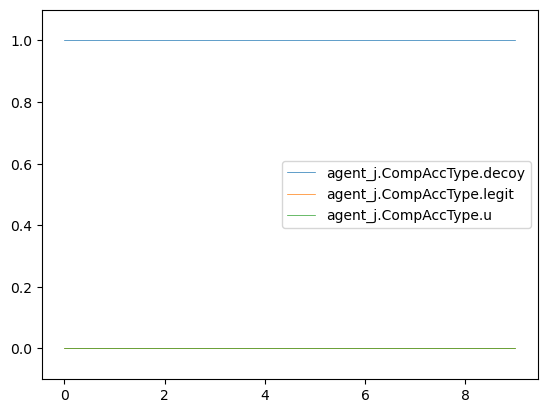

=============DataType============


,state.DataType.decoy,state.DataType.legit,state.DataType.u,agent_i.action,agent_j.action
0,1.0,0.0,0.0,CheckSudo,EnableSudo
1,1.0,0.0,0.0,PrivEsc,Nop
2,1.0,0.0,0.0,FileRecon,Nop
3,1.0,0.0,0.0,ManipulateData,Nop
4,1.0,0.0,0.0,Nop,Nop
5,1.0,0.0,0.0,Nop,Nop
6,1.0,0.0,0.0,Nop,Nop
7,1.0,0.0,0.0,Nop,Nop
8,1.0,0.0,0.0,Nop,Nop
9,1.0,0.0,0.0,Nop,Nop


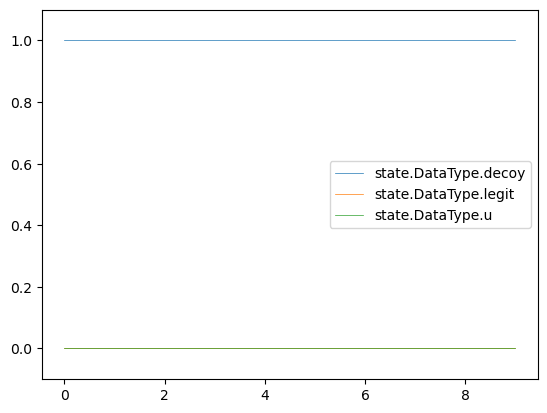

,agent_i.DataType.decoy,agent_i.DataType.legit,agent_i.DataType.u,agent_i.action,agent_j.action,agent_i.observation.ActionResult',agent_i.observation.ConnObs',agent_i.observation.DataTypeObs',agent_i.observation.AccTypeObs'
0,0.500000,0.500000,0.0,CheckSudo,EnableSudo,success,active,legit,decoy
1,0.909091,0.090909,0.0,PrivEsc,Nop,success,active,legit,legit
2,0.909091,0.090909,0.0,FileRecon,Nop,success,active,fake,legit
3,0.888889,0.111111,0.0,ManipulateData,Nop,failure,inactive,fake,decoy
4,0.996633,0.003367,0.0,Nop,Nop,success,inactive,legit,legit
5,0.996633,0.003367,0.0,Nop,Nop,failure,inactive,fake,legit
6,0.996633,0.003367,0.0,Nop,Nop,failure,inactive,fake,decoy
7,0.996633,0.003367,0.0,Nop,Nop,success,inactive,fake,legit
8,0.996633,0.003367,0.0,Nop,Nop,success,inactive,fake,legit
9,0.996633,0.003367,0.0,Nop,Nop,failure,inactive,fake,legit


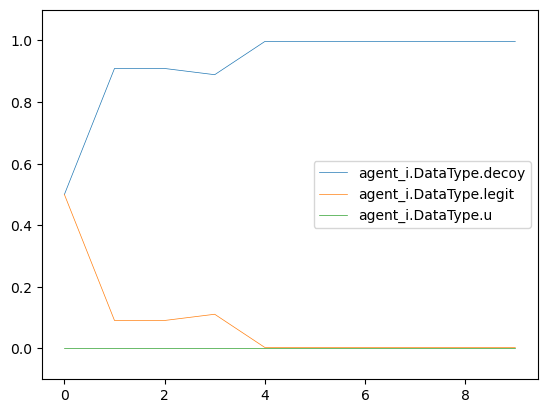

,agent_j.DataType.decoy,agent_j.DataType.legit,agent_j.DataType.u,agent_j.action,agent_i.action,agent_j.observation.EndPtAlerts'
0,1.0,0.0,0.0,EnableSudo,CheckSudo,none
1,1.0,0.0,0.0,Nop,PrivEsc,su_login
2,1.0,0.0,0.0,Nop,FileRecon,file_enum
3,1.0,0.0,0.0,Nop,ManipulateData,none
4,1.0,0.0,0.0,Nop,Nop,none
5,1.0,0.0,0.0,Nop,Nop,su_login
6,1.0,0.0,0.0,Nop,Nop,none
7,1.0,0.0,0.0,Nop,Nop,none
8,1.0,0.0,0.0,Nop,Nop,su_login
9,1.0,0.0,0.0,Nop,Nop,none


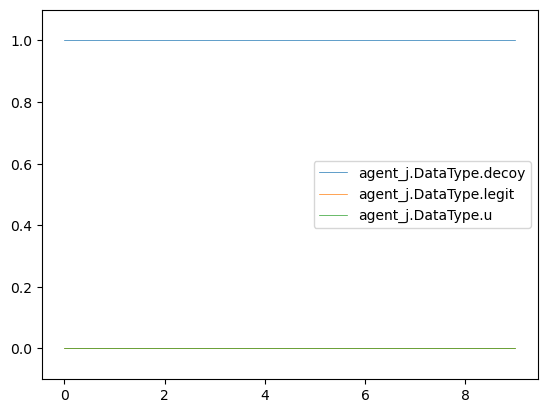

=============DataFound============


,state.DataFound.no,state.DataFound.yes,agent_i.action,agent_j.action
0,1.0,0.0,CheckSudo,EnableSudo
1,1.0,0.0,PrivEsc,Nop
2,1.0,0.0,FileRecon,Nop
3,0.0,1.0,ManipulateData,Nop
4,0.0,1.0,Nop,Nop
5,0.0,1.0,Nop,Nop
6,0.0,1.0,Nop,Nop
7,0.0,1.0,Nop,Nop
8,0.0,1.0,Nop,Nop
9,0.0,1.0,Nop,Nop


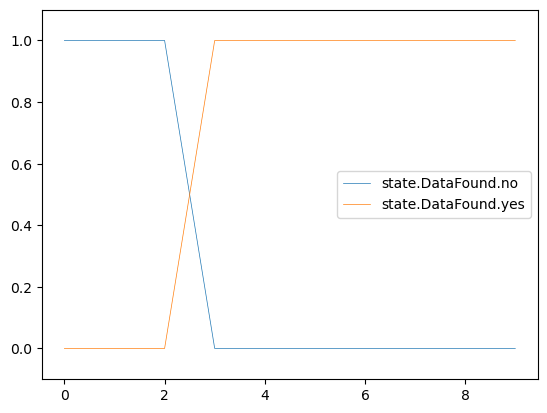

,agent_i.DataFound.no,agent_i.DataFound.yes,agent_i.action,agent_j.action,agent_i.observation.ActionResult',agent_i.observation.ConnObs',agent_i.observation.DataTypeObs',agent_i.observation.AccTypeObs'
0,1.000000,0.000000,CheckSudo,EnableSudo,success,active,legit,decoy
1,1.000000,0.000000,PrivEsc,Nop,success,active,legit,legit
2,1.000000,0.000000,FileRecon,Nop,success,active,fake,legit
3,0.027027,0.972973,ManipulateData,Nop,failure,inactive,fake,decoy
4,0.030303,0.969697,Nop,Nop,success,inactive,legit,legit
5,0.030303,0.969697,Nop,Nop,failure,inactive,fake,legit
6,0.030303,0.969697,Nop,Nop,failure,inactive,fake,decoy
7,0.030303,0.969697,Nop,Nop,success,inactive,fake,legit
8,0.030303,0.969697,Nop,Nop,success,inactive,fake,legit
9,0.030303,0.969697,Nop,Nop,failure,inactive,fake,legit


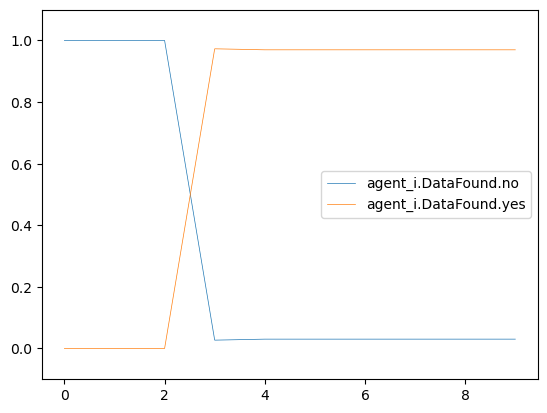

,agent_j.DataFound.no,agent_j.DataFound.yes,agent_j.action,agent_i.action,agent_j.observation.EndPtAlerts'
0,1.000000,0.000000,EnableSudo,CheckSudo,none
1,1.000000,0.000000,Nop,PrivEsc,su_login
2,1.000000,0.000000,Nop,FileRecon,file_enum
3,0.200000,0.800000,Nop,ManipulateData,none
4,0.056000,0.944000,Nop,Nop,none
5,0.027265,0.972735,Nop,Nop,su_login
6,0.026901,0.973099,Nop,Nop,none
7,0.026833,0.973167,Nop,Nop,none
8,0.026832,0.973168,Nop,Nop,su_login
9,0.026832,0.973168,Nop,Nop,none


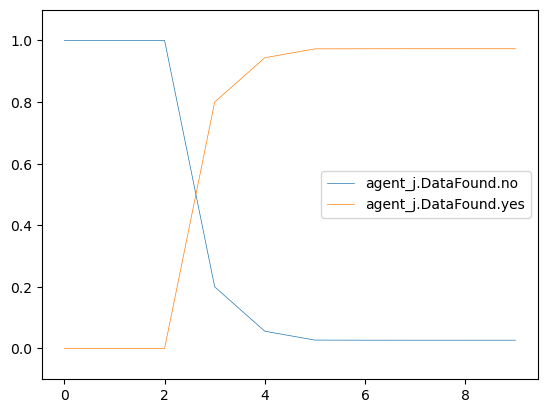

=============AccessLevel============


,state.AccessLevel.root,state.AccessLevel.user,agent_i.action,agent_j.action
0,0.0,1.0,CheckSudo,EnableSudo
1,0.0,1.0,PrivEsc,Nop
2,1.0,0.0,FileRecon,Nop
3,1.0,0.0,ManipulateData,Nop
4,1.0,0.0,Nop,Nop
5,1.0,0.0,Nop,Nop
6,1.0,0.0,Nop,Nop
7,1.0,0.0,Nop,Nop
8,1.0,0.0,Nop,Nop
9,1.0,0.0,Nop,Nop


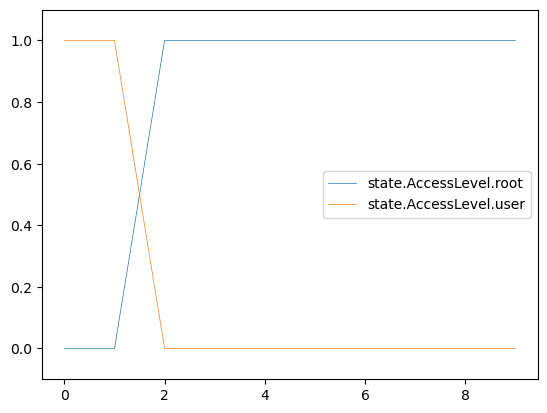

,agent_i.AccessLevel.root,agent_i.AccessLevel.user,agent_i.action,agent_j.action,agent_i.observation.ActionResult',agent_i.observation.ConnObs',agent_i.observation.DataTypeObs',agent_i.observation.AccTypeObs'
0,0.0,1.0,CheckSudo,EnableSudo,success,active,legit,decoy
1,0.0,1.0,PrivEsc,Nop,success,active,legit,legit
2,1.0,0.0,FileRecon,Nop,success,active,fake,legit
3,1.0,0.0,ManipulateData,Nop,failure,inactive,fake,decoy
4,1.0,0.0,Nop,Nop,success,inactive,legit,legit
5,1.0,0.0,Nop,Nop,failure,inactive,fake,legit
6,1.0,0.0,Nop,Nop,failure,inactive,fake,decoy
7,1.0,0.0,Nop,Nop,success,inactive,fake,legit
8,1.0,0.0,Nop,Nop,success,inactive,fake,legit
9,1.0,0.0,Nop,Nop,failure,inactive,fake,legit


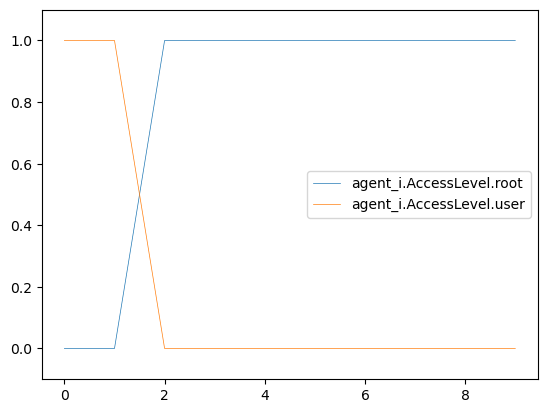

,agent_j.AccessLevel.root,agent_j.AccessLevel.user,agent_j.action,agent_i.action,agent_j.observation.EndPtAlerts'
0,0.0,1.0,EnableSudo,CheckSudo,none
1,0.0,1.0,Nop,PrivEsc,su_login
2,1.0,0.0,Nop,FileRecon,file_enum
3,1.0,0.0,Nop,ManipulateData,none
4,1.0,0.0,Nop,Nop,none
5,1.0,0.0,Nop,Nop,su_login
6,1.0,0.0,Nop,Nop,none
7,1.0,0.0,Nop,Nop,none
8,1.0,0.0,Nop,Nop,su_login
9,1.0,0.0,Nop,Nop,none


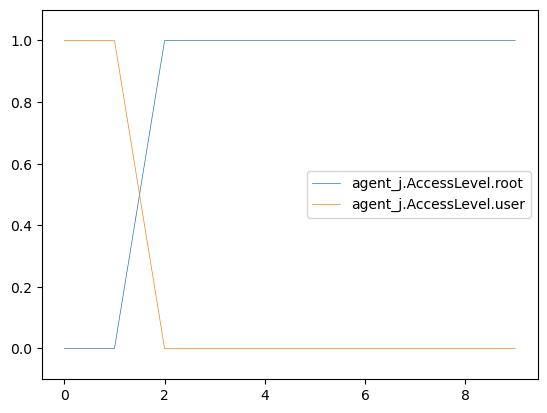

=============SudoAvailable============


,state.SudoAvailable.no,state.SudoAvailable.yes,agent_i.action,agent_j.action
0,1.0,0.0,CheckSudo,EnableSudo
1,0.0,1.0,PrivEsc,Nop
2,0.0,1.0,FileRecon,Nop
3,0.0,1.0,ManipulateData,Nop
4,0.0,1.0,Nop,Nop
5,0.0,1.0,Nop,Nop
6,0.0,1.0,Nop,Nop
7,0.0,1.0,Nop,Nop
8,0.0,1.0,Nop,Nop
9,0.0,1.0,Nop,Nop


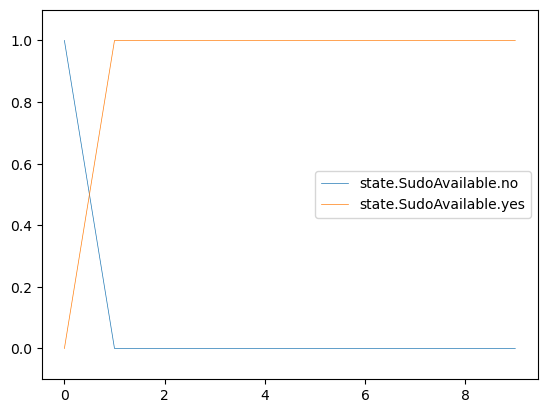

,agent_i.SudoAvailable.no,agent_i.SudoAvailable.yes,agent_i.action,agent_j.action,agent_i.observation.ActionResult',agent_i.observation.ConnObs',agent_i.observation.DataTypeObs',agent_i.observation.AccTypeObs'
0,0.5,0.5,CheckSudo,EnableSudo,success,active,legit,decoy
1,0.0,1.0,PrivEsc,Nop,success,active,legit,legit
2,0.0,1.0,FileRecon,Nop,success,active,fake,legit
3,0.0,1.0,ManipulateData,Nop,failure,inactive,fake,decoy
4,0.0,1.0,Nop,Nop,success,inactive,legit,legit
5,0.0,1.0,Nop,Nop,failure,inactive,fake,legit
6,0.0,1.0,Nop,Nop,failure,inactive,fake,decoy
7,0.0,1.0,Nop,Nop,success,inactive,fake,legit
8,0.0,1.0,Nop,Nop,success,inactive,fake,legit
9,0.0,1.0,Nop,Nop,failure,inactive,fake,legit


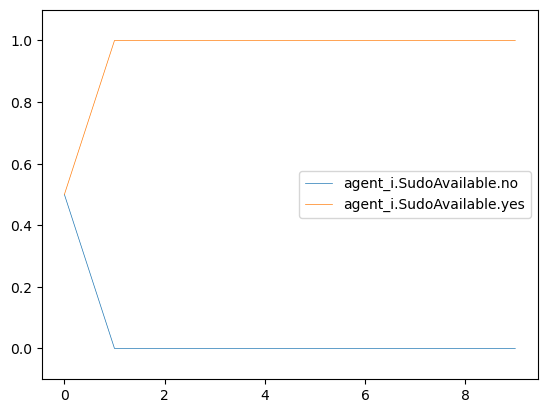

,agent_j.SudoAvailable.no,agent_j.SudoAvailable.yes,agent_j.action,agent_i.action,agent_j.observation.EndPtAlerts'
0,1.0,0.0,EnableSudo,CheckSudo,none
1,0.0,1.0,Nop,PrivEsc,su_login
2,0.0,1.0,Nop,FileRecon,file_enum
3,0.0,1.0,Nop,ManipulateData,none
4,0.0,1.0,Nop,Nop,none
5,0.0,1.0,Nop,Nop,su_login
6,0.0,1.0,Nop,Nop,none
7,0.0,1.0,Nop,Nop,none
8,0.0,1.0,Nop,Nop,su_login
9,0.0,1.0,Nop,Nop,none


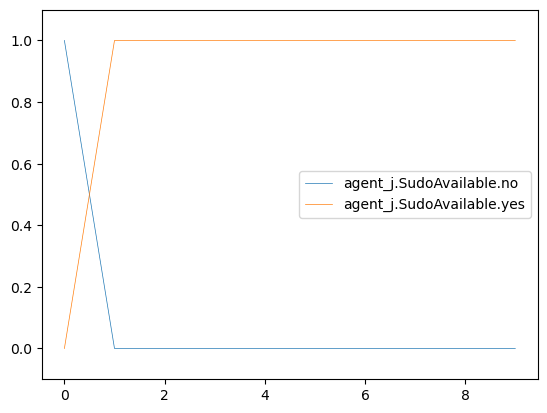

=============DataAccessPol============


,state.DataAccessPol.permissive,state.DataAccessPol.strict,agent_i.action,agent_j.action
0,0.0,1.0,CheckSudo,EnableSudo
1,0.0,1.0,PrivEsc,Nop
2,0.0,1.0,FileRecon,Nop
3,0.0,1.0,ManipulateData,Nop
4,0.0,1.0,Nop,Nop
5,0.0,1.0,Nop,Nop
6,0.0,1.0,Nop,Nop
7,0.0,1.0,Nop,Nop
8,0.0,1.0,Nop,Nop
9,0.0,1.0,Nop,Nop


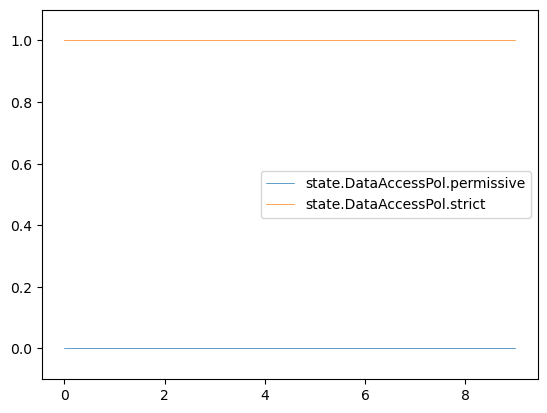

,agent_i.DataAccessPol.permissive,agent_i.DataAccessPol.strict,agent_i.action,agent_j.action,agent_i.observation.ActionResult',agent_i.observation.ConnObs',agent_i.observation.DataTypeObs',agent_i.observation.AccTypeObs'
0,0.0,1.0,CheckSudo,EnableSudo,success,active,legit,decoy
1,0.0,1.0,PrivEsc,Nop,success,active,legit,legit
2,0.0,1.0,FileRecon,Nop,success,active,fake,legit
3,0.0,1.0,ManipulateData,Nop,failure,inactive,fake,decoy
4,0.0,1.0,Nop,Nop,success,inactive,legit,legit
5,0.0,1.0,Nop,Nop,failure,inactive,fake,legit
6,0.0,1.0,Nop,Nop,failure,inactive,fake,decoy
7,0.0,1.0,Nop,Nop,success,inactive,fake,legit
8,0.0,1.0,Nop,Nop,success,inactive,fake,legit
9,0.0,1.0,Nop,Nop,failure,inactive,fake,legit


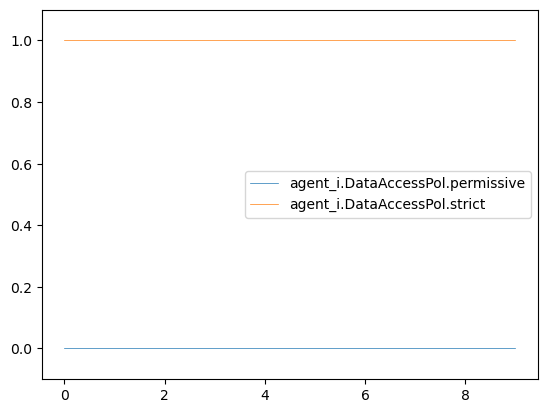

,agent_j.DataAccessPol.permissive,agent_j.DataAccessPol.strict,agent_j.action,agent_i.action,agent_j.observation.EndPtAlerts'
0,0.0,1.0,EnableSudo,CheckSudo,none
1,0.0,1.0,Nop,PrivEsc,su_login
2,0.0,1.0,Nop,FileRecon,file_enum
3,0.0,1.0,Nop,ManipulateData,none
4,0.0,1.0,Nop,Nop,none
5,0.0,1.0,Nop,Nop,su_login
6,0.0,1.0,Nop,Nop,none
7,0.0,1.0,Nop,Nop,none
8,0.0,1.0,Nop,Nop,su_login
9,0.0,1.0,Nop,Nop,none


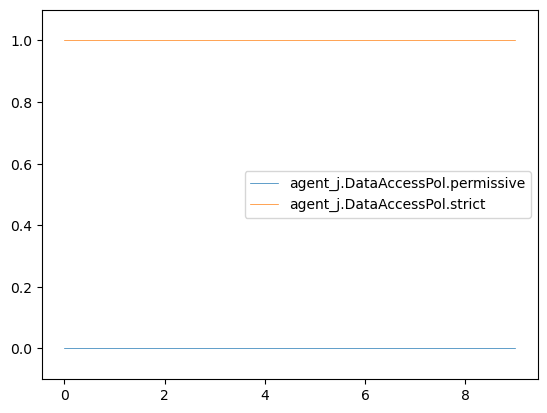

+++++++++++++++++++ End Interaction +++++++++++++++++++
+++++++++++++++++++ Begin Interaction +++++++++++++++++++


,agent_i.thetaj.DefFrame.active,agent_i.thetaj.DefFrame.passive,agent_i.observation.ActionResult',agent_i.observation.ConnObs',agent_i.observation.DataTypeObs',agent_i.observation.AccTypeObs'
0,0.500000,0.500000,success,active,fake,decoy
1,0.818182,0.181818,success,active,fake,decoy
2,0.818182,0.181818,failure,active,fake,decoy
3,0.984802,0.015198,success,active,legit,decoy
4,0.997264,0.002736,success,inactive,fake,legit
5,0.998606,0.001394,success,inactive,legit,decoy
6,0.998606,0.001394,success,inactive,fake,decoy
7,0.998606,0.001394,success,inactive,fake,legit
8,0.998606,0.001394,success,inactive,fake,decoy
9,0.998606,0.001394,success,inactive,fake,legit


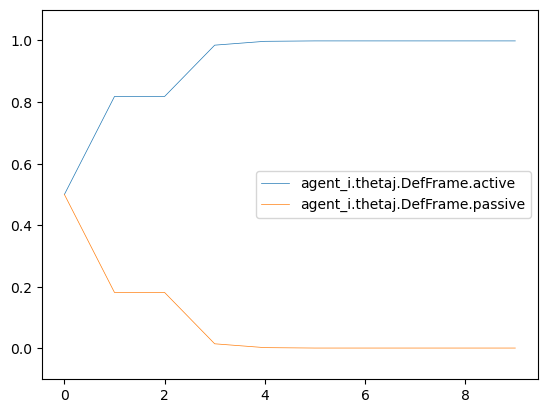

,agent_j.thetaj.AttackerFrame.att,agent_j.observation.EndPtAlerts'
0,1.0,none
1,1.0,su_login
2,1.0,file_enum
3,1.0,file_enum
4,1.0,file_write
5,1.0,none
6,1.0,file_enum
7,1.0,file_enum
8,1.0,none
9,1.0,none


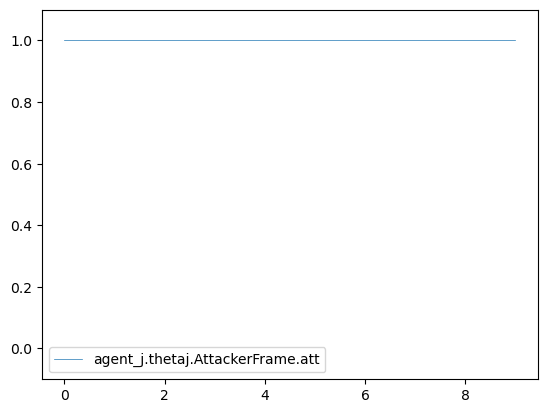

=============AttActive============


,state.AttActive.no,state.AttActive.yes,agent_i.action,agent_j.action
0,0.0,1.0,CheckSudo,EnableSudo
1,0.0,1.0,PrivEsc,Nop
2,0.0,1.0,FileRecon,Nop
3,0.0,1.0,FileRecon,Nop
4,0.0,1.0,ManipulateData,Nop
5,1.0,0.0,Nop,Nop
6,1.0,0.0,Nop,Nop
7,1.0,0.0,Nop,Nop
8,1.0,0.0,Nop,Nop
9,1.0,0.0,Nop,Nop


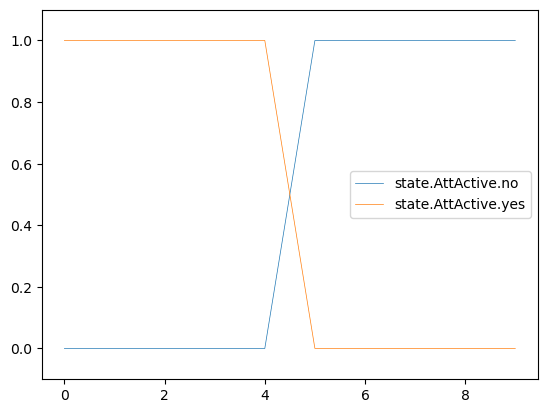

,agent_i.AttActive.no,agent_i.AttActive.yes,agent_i.action,agent_j.action,agent_i.observation.ActionResult',agent_i.observation.ConnObs',agent_i.observation.DataTypeObs',agent_i.observation.AccTypeObs'
0,0.0,1.0,CheckSudo,EnableSudo,success,active,fake,decoy
1,0.0,1.0,PrivEsc,Nop,success,active,fake,decoy
2,0.0,1.0,FileRecon,Nop,failure,active,fake,decoy
3,0.0,1.0,FileRecon,Nop,success,active,legit,decoy
4,0.0,1.0,ManipulateData,Nop,success,inactive,fake,legit
5,1.0,0.0,Nop,Nop,success,inactive,legit,decoy
6,1.0,0.0,Nop,Nop,success,inactive,fake,decoy
7,1.0,0.0,Nop,Nop,success,inactive,fake,legit
8,1.0,0.0,Nop,Nop,success,inactive,fake,decoy
9,1.0,0.0,Nop,Nop,success,inactive,fake,legit


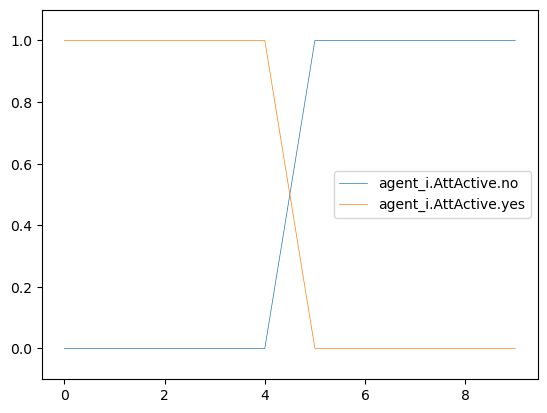

,agent_j.AttActive.no,agent_j.AttActive.yes,agent_j.action,agent_i.action,agent_j.observation.EndPtAlerts'
0,0.000000,1.000000,EnableSudo,CheckSudo,none
1,0.000000,1.000000,Nop,PrivEsc,su_login
2,0.000000,1.000000,Nop,FileRecon,file_enum
3,0.000000,1.000000,Nop,FileRecon,file_enum
4,0.143411,0.856589,Nop,ManipulateData,file_write
5,0.984722,0.015279,Nop,Nop,none
6,0.999823,0.000177,Nop,Nop,file_enum
7,0.999435,0.000565,Nop,Nop,file_enum
8,0.998235,0.001765,Nop,Nop,none
9,0.999981,0.000019,Nop,Nop,none


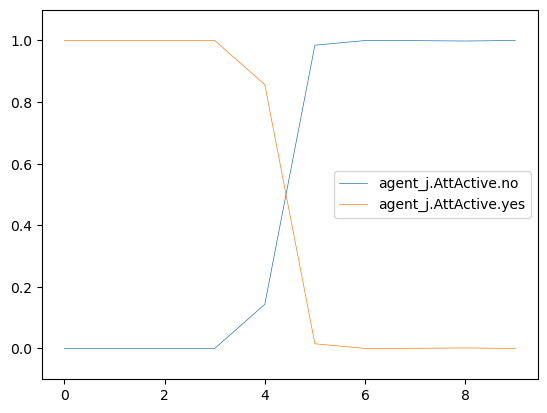

=============CompAccType============


,state.CompAccType.decoy,state.CompAccType.legit,state.CompAccType.u,agent_i.action,agent_j.action
0,1.0,0.0,0.0,CheckSudo,EnableSudo
1,1.0,0.0,0.0,PrivEsc,Nop
2,1.0,0.0,0.0,FileRecon,Nop
3,1.0,0.0,0.0,FileRecon,Nop
4,1.0,0.0,0.0,ManipulateData,Nop
5,1.0,0.0,0.0,Nop,Nop
6,1.0,0.0,0.0,Nop,Nop
7,1.0,0.0,0.0,Nop,Nop
8,1.0,0.0,0.0,Nop,Nop
9,1.0,0.0,0.0,Nop,Nop


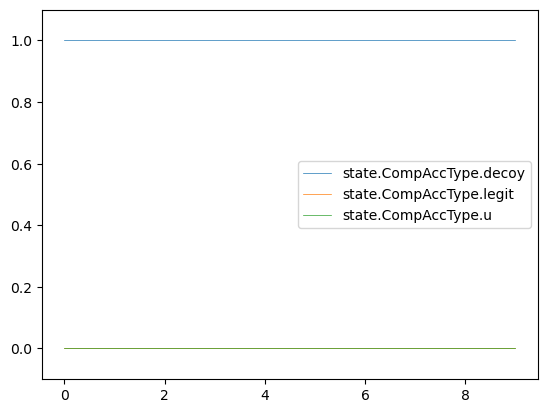

,agent_i.CompAccType.decoy,agent_i.CompAccType.legit,agent_i.CompAccType.u,agent_i.action,agent_j.action,agent_i.observation.ActionResult',agent_i.observation.ConnObs',agent_i.observation.DataTypeObs',agent_i.observation.AccTypeObs'
0,0.500000,0.500000,0.0,CheckSudo,EnableSudo,success,active,fake,decoy
1,0.818182,0.181818,0.0,PrivEsc,Nop,success,active,fake,decoy
2,0.818182,0.181818,0.0,FileRecon,Nop,failure,active,fake,decoy
3,0.984802,0.015198,0.0,FileRecon,Nop,success,active,legit,decoy
4,0.997264,0.002736,0.0,ManipulateData,Nop,success,inactive,fake,legit
5,0.998606,0.001394,0.0,Nop,Nop,success,inactive,legit,decoy
6,0.998606,0.001394,0.0,Nop,Nop,success,inactive,fake,decoy
7,0.998606,0.001394,0.0,Nop,Nop,success,inactive,fake,legit
8,0.998606,0.001394,0.0,Nop,Nop,success,inactive,fake,decoy
9,0.998606,0.001394,0.0,Nop,Nop,success,inactive,fake,legit


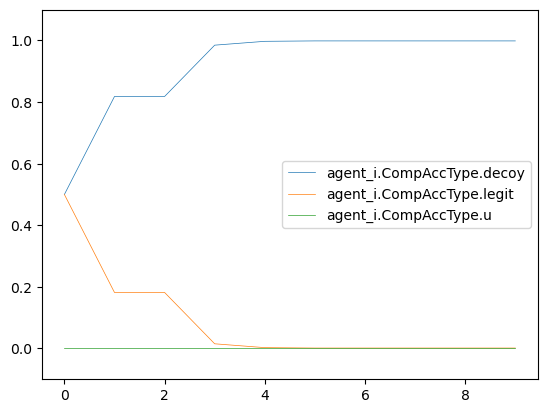

,agent_j.CompAccType.decoy,agent_j.CompAccType.legit,agent_j.CompAccType.u,agent_j.action,agent_i.action,agent_j.observation.EndPtAlerts'
0,1.0,0.0,0.0,EnableSudo,CheckSudo,none
1,1.0,0.0,0.0,Nop,PrivEsc,su_login
2,1.0,0.0,0.0,Nop,FileRecon,file_enum
3,1.0,0.0,0.0,Nop,FileRecon,file_enum
4,1.0,0.0,0.0,Nop,ManipulateData,file_write
5,1.0,0.0,0.0,Nop,Nop,none
6,1.0,0.0,0.0,Nop,Nop,file_enum
7,1.0,0.0,0.0,Nop,Nop,file_enum
8,1.0,0.0,0.0,Nop,Nop,none
9,1.0,0.0,0.0,Nop,Nop,none


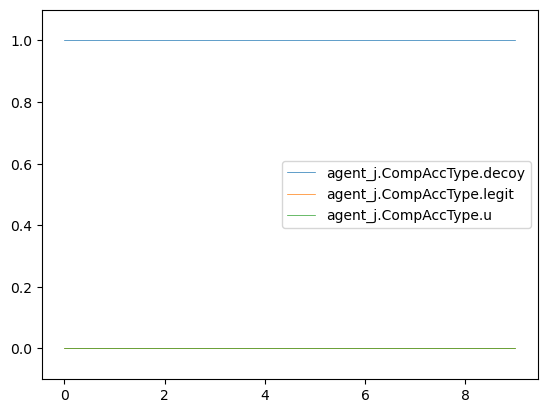

=============DataType============


,state.DataType.decoy,state.DataType.legit,state.DataType.u,agent_i.action,agent_j.action
0,1.0,0.0,0.0,CheckSudo,EnableSudo
1,1.0,0.0,0.0,PrivEsc,Nop
2,1.0,0.0,0.0,FileRecon,Nop
3,1.0,0.0,0.0,FileRecon,Nop
4,1.0,0.0,0.0,ManipulateData,Nop
5,1.0,0.0,0.0,Nop,Nop
6,1.0,0.0,0.0,Nop,Nop
7,1.0,0.0,0.0,Nop,Nop
8,1.0,0.0,0.0,Nop,Nop
9,1.0,0.0,0.0,Nop,Nop


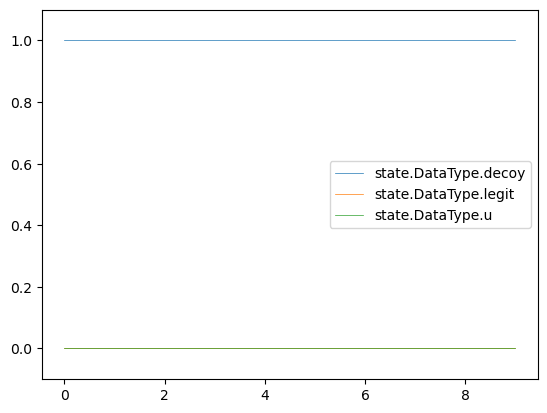

,agent_i.DataType.decoy,agent_i.DataType.legit,agent_i.DataType.u,agent_i.action,agent_j.action,agent_i.observation.ActionResult',agent_i.observation.ConnObs',agent_i.observation.DataTypeObs',agent_i.observation.AccTypeObs'
0,0.500000,0.500000,0.0,CheckSudo,EnableSudo,success,active,fake,decoy
1,0.909091,0.090909,0.0,PrivEsc,Nop,success,active,fake,decoy
2,0.909091,0.090909,0.0,FileRecon,Nop,failure,active,fake,decoy
3,0.996960,0.003040,0.0,FileRecon,Nop,success,active,legit,decoy
4,0.998632,0.001368,0.0,ManipulateData,Nop,success,inactive,fake,legit
5,0.999976,0.000024,0.0,Nop,Nop,success,inactive,legit,decoy
6,0.999976,0.000024,0.0,Nop,Nop,success,inactive,fake,decoy
7,0.999976,0.000024,0.0,Nop,Nop,success,inactive,fake,legit
8,0.999976,0.000024,0.0,Nop,Nop,success,inactive,fake,decoy
9,0.999976,0.000024,0.0,Nop,Nop,success,inactive,fake,legit


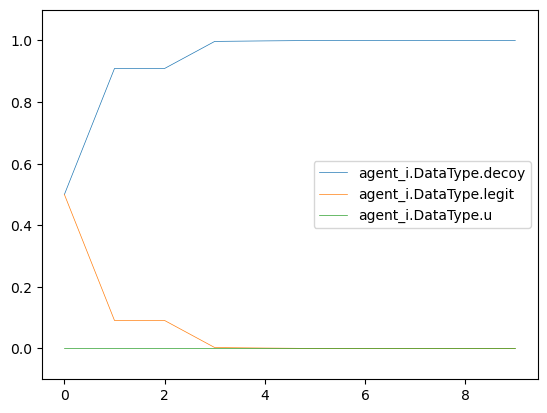

,agent_j.DataType.decoy,agent_j.DataType.legit,agent_j.DataType.u,agent_j.action,agent_i.action,agent_j.observation.EndPtAlerts'
0,1.0,0.0,0.0,EnableSudo,CheckSudo,none
1,1.0,0.0,0.0,Nop,PrivEsc,su_login
2,1.0,0.0,0.0,Nop,FileRecon,file_enum
3,1.0,0.0,0.0,Nop,FileRecon,file_enum
4,1.0,0.0,0.0,Nop,ManipulateData,file_write
5,1.0,0.0,0.0,Nop,Nop,none
6,1.0,0.0,0.0,Nop,Nop,file_enum
7,1.0,0.0,0.0,Nop,Nop,file_enum
8,1.0,0.0,0.0,Nop,Nop,none
9,1.0,0.0,0.0,Nop,Nop,none


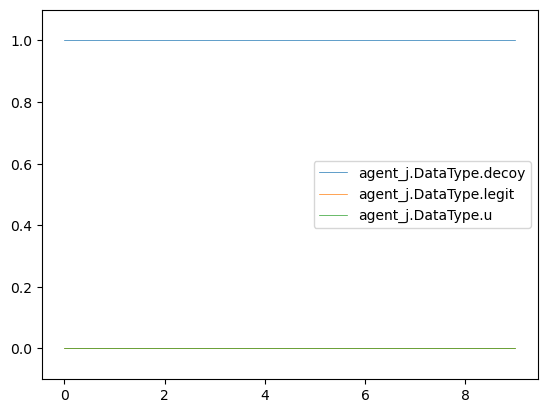

=============DataFound============


,state.DataFound.no,state.DataFound.yes,agent_i.action,agent_j.action
0,1.0,0.0,CheckSudo,EnableSudo
1,1.0,0.0,PrivEsc,Nop
2,1.0,0.0,FileRecon,Nop
3,1.0,0.0,FileRecon,Nop
4,0.0,1.0,ManipulateData,Nop
5,0.0,1.0,Nop,Nop
6,0.0,1.0,Nop,Nop
7,0.0,1.0,Nop,Nop
8,0.0,1.0,Nop,Nop
9,0.0,1.0,Nop,Nop


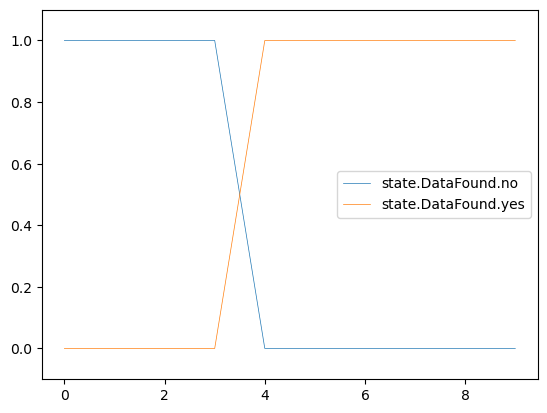

,agent_i.DataFound.no,agent_i.DataFound.yes,agent_i.action,agent_j.action,agent_i.observation.ActionResult',agent_i.observation.ConnObs',agent_i.observation.DataTypeObs',agent_i.observation.AccTypeObs'
0,1.000000,0.000000,CheckSudo,EnableSudo,success,active,fake,decoy
1,1.000000,0.000000,PrivEsc,Nop,success,active,fake,decoy
2,1.000000,0.000000,FileRecon,Nop,failure,active,fake,decoy
3,0.692308,0.307692,FileRecon,Nop,success,active,legit,decoy
4,0.017544,0.982456,ManipulateData,Nop,success,inactive,fake,legit
5,0.017567,0.982433,Nop,Nop,success,inactive,legit,decoy
6,0.017567,0.982433,Nop,Nop,success,inactive,fake,decoy
7,0.017567,0.982433,Nop,Nop,success,inactive,fake,legit
8,0.017567,0.982433,Nop,Nop,success,inactive,fake,decoy
9,0.017567,0.982433,Nop,Nop,success,inactive,fake,legit


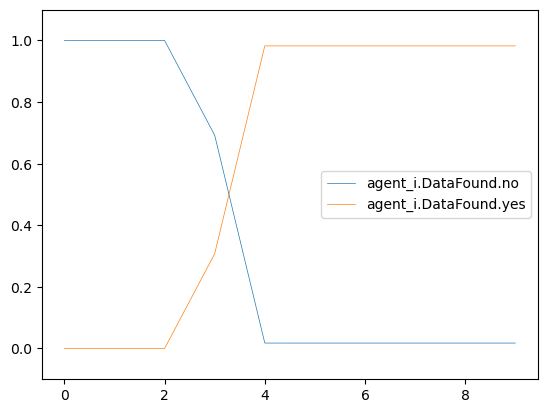

,agent_j.DataFound.no,agent_j.DataFound.yes,agent_j.action,agent_i.action,agent_j.observation.EndPtAlerts'
0,1.000000,0.000000,EnableSudo,CheckSudo,none
1,1.000000,0.000000,Nop,PrivEsc,su_login
2,1.000000,0.000000,Nop,FileRecon,file_enum
3,0.200000,0.800000,Nop,FileRecon,file_enum
4,0.122481,0.877519,Nop,ManipulateData,file_write
5,0.019198,0.980803,Nop,Nop,none
6,0.017675,0.982325,Nop,Nop,file_enum
7,0.017707,0.982293,Nop,Nop,file_enum
8,0.017806,0.982194,Nop,Nop,none
9,0.017657,0.982343,Nop,Nop,none


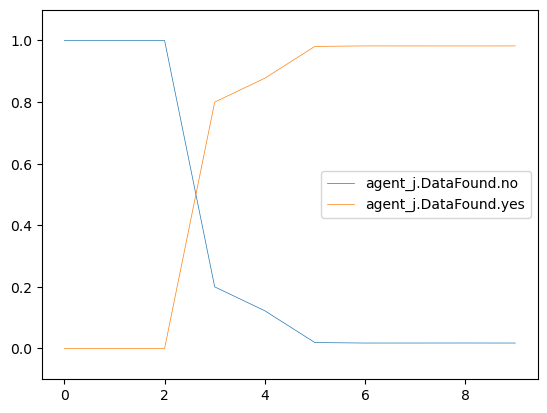

=============AccessLevel============


,state.AccessLevel.root,state.AccessLevel.user,agent_i.action,agent_j.action
0,0.0,1.0,CheckSudo,EnableSudo
1,0.0,1.0,PrivEsc,Nop
2,1.0,0.0,FileRecon,Nop
3,1.0,0.0,FileRecon,Nop
4,1.0,0.0,ManipulateData,Nop
5,1.0,0.0,Nop,Nop
6,1.0,0.0,Nop,Nop
7,1.0,0.0,Nop,Nop
8,1.0,0.0,Nop,Nop
9,1.0,0.0,Nop,Nop


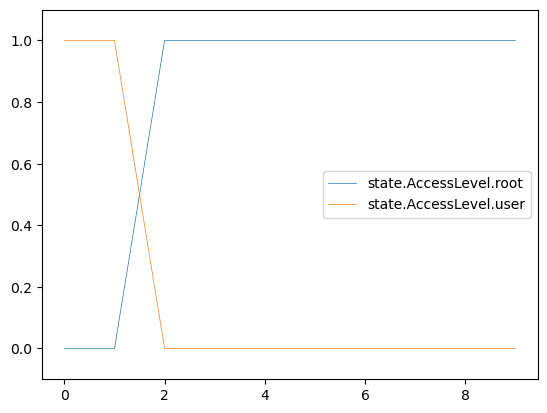

,agent_i.AccessLevel.root,agent_i.AccessLevel.user,agent_i.action,agent_j.action,agent_i.observation.ActionResult',agent_i.observation.ConnObs',agent_i.observation.DataTypeObs',agent_i.observation.AccTypeObs'
0,0.0,1.0,CheckSudo,EnableSudo,success,active,fake,decoy
1,0.0,1.0,PrivEsc,Nop,success,active,fake,decoy
2,1.0,0.0,FileRecon,Nop,failure,active,fake,decoy
3,1.0,0.0,FileRecon,Nop,success,active,legit,decoy
4,1.0,0.0,ManipulateData,Nop,success,inactive,fake,legit
5,1.0,0.0,Nop,Nop,success,inactive,legit,decoy
6,1.0,0.0,Nop,Nop,success,inactive,fake,decoy
7,1.0,0.0,Nop,Nop,success,inactive,fake,legit
8,1.0,0.0,Nop,Nop,success,inactive,fake,decoy
9,1.0,0.0,Nop,Nop,success,inactive,fake,legit


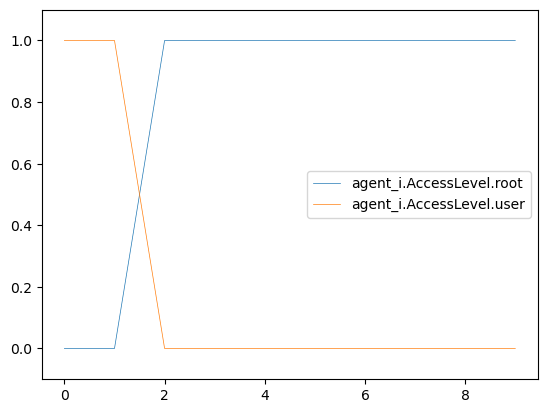

,agent_j.AccessLevel.root,agent_j.AccessLevel.user,agent_j.action,agent_i.action,agent_j.observation.EndPtAlerts'
0,0.0,1.0,EnableSudo,CheckSudo,none
1,0.0,1.0,Nop,PrivEsc,su_login
2,1.0,0.0,Nop,FileRecon,file_enum
3,1.0,0.0,Nop,FileRecon,file_enum
4,1.0,0.0,Nop,ManipulateData,file_write
5,1.0,0.0,Nop,Nop,none
6,1.0,0.0,Nop,Nop,file_enum
7,1.0,0.0,Nop,Nop,file_enum
8,1.0,0.0,Nop,Nop,none
9,1.0,0.0,Nop,Nop,none


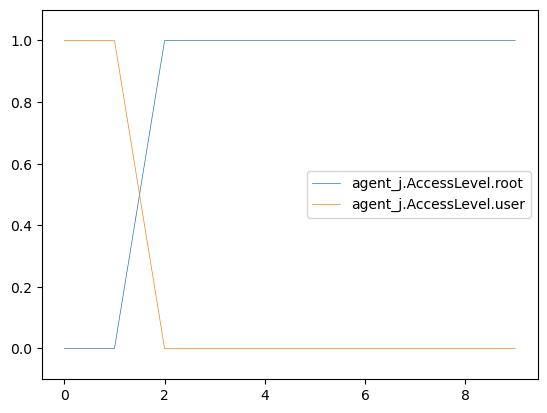

=============SudoAvailable============


,state.SudoAvailable.no,state.SudoAvailable.yes,agent_i.action,agent_j.action
0,1.0,0.0,CheckSudo,EnableSudo
1,0.0,1.0,PrivEsc,Nop
2,0.0,1.0,FileRecon,Nop
3,0.0,1.0,FileRecon,Nop
4,0.0,1.0,ManipulateData,Nop
5,0.0,1.0,Nop,Nop
6,0.0,1.0,Nop,Nop
7,0.0,1.0,Nop,Nop
8,0.0,1.0,Nop,Nop
9,0.0,1.0,Nop,Nop


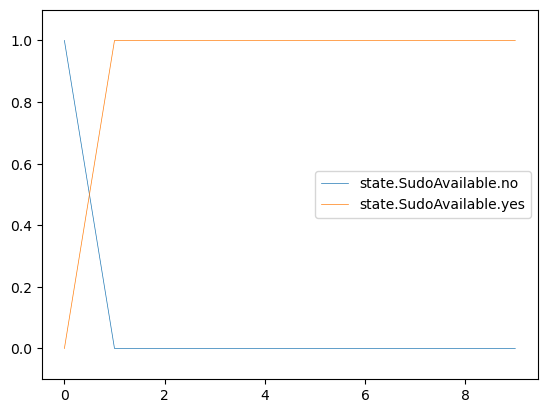

,agent_i.SudoAvailable.no,agent_i.SudoAvailable.yes,agent_i.action,agent_j.action,agent_i.observation.ActionResult',agent_i.observation.ConnObs',agent_i.observation.DataTypeObs',agent_i.observation.AccTypeObs'
0,0.5,0.5,CheckSudo,EnableSudo,success,active,fake,decoy
1,0.0,1.0,PrivEsc,Nop,success,active,fake,decoy
2,0.0,1.0,FileRecon,Nop,failure,active,fake,decoy
3,0.0,1.0,FileRecon,Nop,success,active,legit,decoy
4,0.0,1.0,ManipulateData,Nop,success,inactive,fake,legit
5,0.0,1.0,Nop,Nop,success,inactive,legit,decoy
6,0.0,1.0,Nop,Nop,success,inactive,fake,decoy
7,0.0,1.0,Nop,Nop,success,inactive,fake,legit
8,0.0,1.0,Nop,Nop,success,inactive,fake,decoy
9,0.0,1.0,Nop,Nop,success,inactive,fake,legit


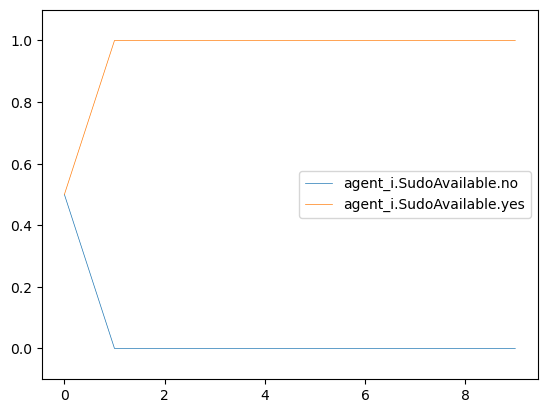

,agent_j.SudoAvailable.no,agent_j.SudoAvailable.yes,agent_j.action,agent_i.action,agent_j.observation.EndPtAlerts'
0,1.0,0.0,EnableSudo,CheckSudo,none
1,0.0,1.0,Nop,PrivEsc,su_login
2,0.0,1.0,Nop,FileRecon,file_enum
3,0.0,1.0,Nop,FileRecon,file_enum
4,0.0,1.0,Nop,ManipulateData,file_write
5,0.0,1.0,Nop,Nop,none
6,0.0,1.0,Nop,Nop,file_enum
7,0.0,1.0,Nop,Nop,file_enum
8,0.0,1.0,Nop,Nop,none
9,0.0,1.0,Nop,Nop,none


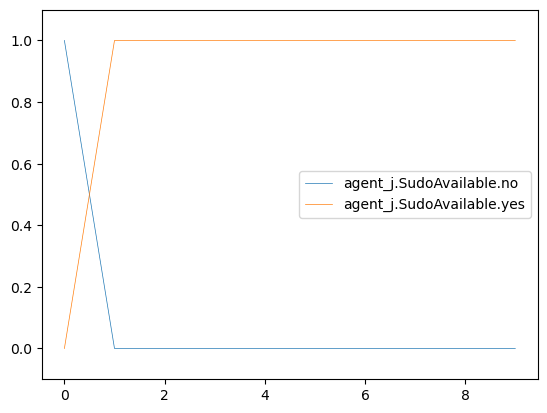

=============DataAccessPol============


,state.DataAccessPol.permissive,state.DataAccessPol.strict,agent_i.action,agent_j.action
0,0.0,1.0,CheckSudo,EnableSudo
1,0.0,1.0,PrivEsc,Nop
2,0.0,1.0,FileRecon,Nop
3,0.0,1.0,FileRecon,Nop
4,0.0,1.0,ManipulateData,Nop
5,0.0,1.0,Nop,Nop
6,0.0,1.0,Nop,Nop
7,0.0,1.0,Nop,Nop
8,0.0,1.0,Nop,Nop
9,0.0,1.0,Nop,Nop


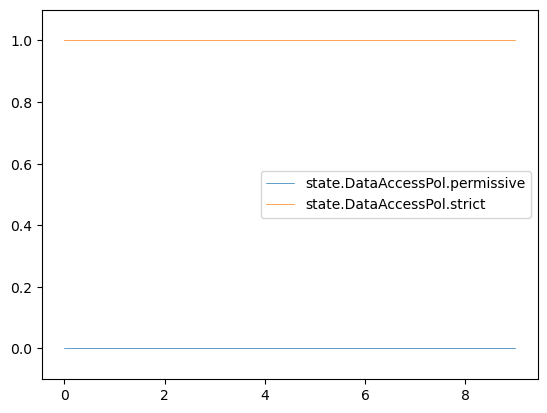

,agent_i.DataAccessPol.permissive,agent_i.DataAccessPol.strict,agent_i.action,agent_j.action,agent_i.observation.ActionResult',agent_i.observation.ConnObs',agent_i.observation.DataTypeObs',agent_i.observation.AccTypeObs'
0,0.0,1.0,CheckSudo,EnableSudo,success,active,fake,decoy
1,0.0,1.0,PrivEsc,Nop,success,active,fake,decoy
2,0.0,1.0,FileRecon,Nop,failure,active,fake,decoy
3,0.0,1.0,FileRecon,Nop,success,active,legit,decoy
4,0.0,1.0,ManipulateData,Nop,success,inactive,fake,legit
5,0.0,1.0,Nop,Nop,success,inactive,legit,decoy
6,0.0,1.0,Nop,Nop,success,inactive,fake,decoy
7,0.0,1.0,Nop,Nop,success,inactive,fake,legit
8,0.0,1.0,Nop,Nop,success,inactive,fake,decoy
9,0.0,1.0,Nop,Nop,success,inactive,fake,legit


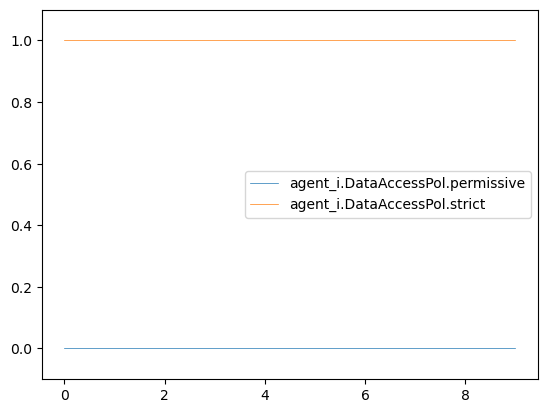

,agent_j.DataAccessPol.permissive,agent_j.DataAccessPol.strict,agent_j.action,agent_i.action,agent_j.observation.EndPtAlerts'
0,0.0,1.0,EnableSudo,CheckSudo,none
1,0.0,1.0,Nop,PrivEsc,su_login
2,0.0,1.0,Nop,FileRecon,file_enum
3,0.0,1.0,Nop,FileRecon,file_enum
4,0.0,1.0,Nop,ManipulateData,file_write
5,0.0,1.0,Nop,Nop,none
6,0.0,1.0,Nop,Nop,file_enum
7,0.0,1.0,Nop,Nop,file_enum
8,0.0,1.0,Nop,Nop,none
9,0.0,1.0,Nop,Nop,none


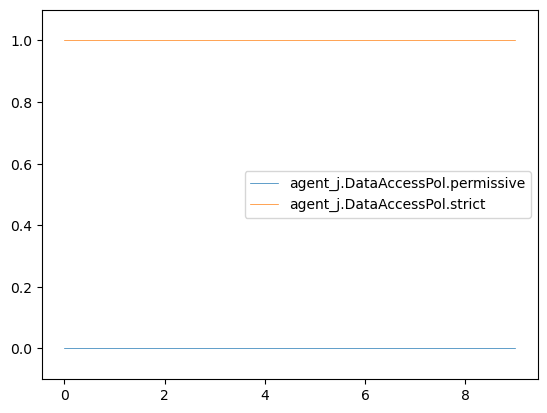

+++++++++++++++++++ End Interaction +++++++++++++++++++


In [7]:
# Get belief over opponent frames
def get_opponent_frame(dataframe):
    
    thetaj_columns = list(filter(lambda x: "thetaj" in x.split("."), dataframe))
    
    if len(thetaj_columns) > 0:
        return dataframe[thetaj_columns]
    
    else:
        return None

# Print and plot P(Theta_j)
def print_thetaj_belief(belief_thetaj_df, obs):
    df = pandas.concat([belief_thetaj_df, obs], axis=1)
    display(df)
    df.plot(linewidth=0.5)
    plotter.ylim(-0.1, 1.1)
    plotter.show()

# Summarize beliefs
def summarize_beliefs(state_vars, dataframe):
    print(f"+++++++++++++++++++ Begin Interaction +++++++++++++++++++")
    agent_i_data = filter_columns_by_agent(dataframe, "agent_i")
    agent_j_data = filter_columns_by_agent(dataframe, "agent_j")
    states = filter_columns_by_agent(dataframe, "state")
    
    actions_i = filter_columns_by_state(agent_i_data, "action")
    actions_j = filter_columns_by_state(agent_j_data, "action")
    
    obs_i = filter_columns_by_state(agent_i_data, "observation")
    obs_j = filter_columns_by_state(agent_j_data, "observation")
    
    i_belief_thetaj = get_opponent_frame(agent_i_data)
    if i_belief_thetaj is not None:
        print_thetaj_belief(i_belief_thetaj, obs_i)
    
    j_belief_thetaj = get_opponent_frame(agent_j_data)
    if j_belief_thetaj is not None:
        print_thetaj_belief(j_belief_thetaj, obs_j)
    
    for var in state_vars:
        print(f"============={var}============")
        # show state
        state_values = filter_columns_by_state(states, var)
        state_values = pandas.concat([state_values, actions_i, actions_j], axis = 1)
        display(state_values)
        state_values.plot(linewidth=0.5)
        plotter.ylim(-0.1, 1.1)
        plotter.show()
        
        # show agent i
        agent_i_beliefs = filter_columns_by_state(agent_i_data, var)
        agent_i_beliefs = pandas.concat([agent_i_beliefs, actions_i, actions_j, obs_i], axis = 1)
        display(agent_i_beliefs)
        agent_i_beliefs.plot(linewidth=0.5)
        plotter.ylim(-0.1, 1.1)
        plotter.show()
        
        # show agent j
        agent_j_beliefs = filter_columns_by_state(agent_j_data, var)
        agent_j_beliefs = pandas.concat([agent_j_beliefs, actions_j, actions_i, obs_j], axis = 1)
        display(agent_j_beliefs)
        agent_j_beliefs.plot(linewidth=0.5)
        plotter.ylim(-0.1, 1.1)
        plotter.show()
        print("==============================")
    
    print(f"+++++++++++++++++++ End Interaction +++++++++++++++++++")

# Use state data to figure out the state variables
def get_state_vars(columns):
    
    states = filter(lambda x: "state" in x.split(".") and len(x.split(".")) >= 2, columns)
    state_vars = map(lambda x: x.split(".")[1], states)
    
    return list(set(state_vars))

# Fetch dataframe with columns belonging to a particular agent
def filter_columns_by_agent(dataframe, name):
    columns = dataframe.columns
    filtered_columns = list(filter(lambda x: name in x.split("."), columns))
    
    df = dataframe[filtered_columns]
    return df

# Get columns containing the state name in the header
def filter_columns_by_state(dataframe, state):
    filtered_columns = list(filter(lambda x: state in x.split("."), dataframe.columns))
    return dataframe[filtered_columns]

# Main loop to summarize all traces
for trace in TRACE_FILES[:5]:
    data = load_json(trace)
    
    dataframe = pandas.json_normalize(data)    
    state_vars = get_state_vars(dataframe.columns)
    
    summarize_beliefs(state_vars, dataframe)

    